In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('gcar_data.csv')
df.head()

Unnamed: 0    brand           model  color registration_date  year  \
0       75721     ford       Ford Kuga  black           05/2023  2023   
1       80184  hyundai     Hyundai i10  black           09/2018  2018   
2       19864     audi  Audi Q4 e-tron   grey           05/2021  2021   
3       76699    honda      Honda CR-V    red           07/2018  2018   
4       92991      kia    Kia Sportage  black           02/2023  2023   

  price_in_euro power_kw power_ps transmission_type fuel_type  \
0         38490      140      190         Automatic    Hybrid   
1         11555       49       67            Manual    Petrol   
2         48886      125      170         Automatic  Electric   
3         24490      114      155         Automatic    Petrol   
4         34990      110      150            Manual    Petrol   

  fuel_consumption_l_100km fuel_consumption_g_km  mileage_in_km  \
0             5,4 l/100 km              124 g/km          100.0   
1             4,6 l/100 km              106 g/km        27782.0   
2                      NaN                0 g/km         4247.0   
3             7,5 l/100 km              175 g/km        57000.0   
4             5,9 l/100 km              150 g/km         7500.0   

                                offer_description  
0  ST-Line Hybrid Adapt.LED+Head-Up-Display Klima  
1             blue Trend,Viele Extras,Top-Zustand  
2    35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21  
3           2.0 Lifestyle Plus Automatik Navi FAP  
4                    1.6 T 48V 2WD Spirit LED, WR

In [3]:
df.shape

(100000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   brand                     100000 non-null  object 
 2   model                     100000 non-null  object 
 3   color                     99924 non-null   object 
 4   registration_date         99999 non-null   object 
 5   year                      100000 non-null  object 
 6   price_in_euro             100000 non-null  object 
 7   power_kw                  99925 non-null   object 
 8   power_ps                  99928 non-null   object 
 9   transmission_type         100000 non-null  object 
 10  fuel_type                 100000 non-null  object 
 11  fuel_consumption_l_100km  88761 non-null   object 
 12  fuel_consumption_g_km     100000 non-null  object 
 13  mileage_in_km             99932 non-null   fl

In [5]:
df.isnull().values.any()

True

In [6]:
df.apply(pd.isnull).sum()

Unnamed: 0                      0
brand                           0
model                           0
color                          76
registration_date               1
year                            0
price_in_euro                   0
power_kw                       75
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11239
fuel_consumption_g_km           0
mileage_in_km                  68
offer_description               0
dtype: int64

In [7]:
df['offer_description']

0          ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1                     blue Trend,Viele Extras,Top-Zustand
2            35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3                   2.0 Lifestyle Plus Automatik Navi FAP
4                            1.6 T 48V 2WD Spirit LED, WR
                               ...                       
99995          Ambition TFSI Navi/Leder/SHZ/PTS/KETTE NEU
99996                         1.2 Lounge +Automatik + PDC
99997    1.5T 2WD Elegance * 1. Hand * 24 Mon. Garantie *
99998              Lusso Ti 2.0 JTDM 16V Xenon Leder Navi
99999           Sportback1.5 Sport|VIRTUAL|NAVI|LED|30KM|
Name: offer_description, Length: 100000, dtype: object

In [8]:
df['model'].nunique()

590

In [9]:
df.drop(columns=['Unnamed: 0','model','registration_date','offer_description'],axis=1,inplace=True)

In [10]:
df.sample(5)

brand   color  year price_in_euro power_kw power_ps  \
47264      bmw    grey  2007         19999      110      150   
64055     audi  silver  2003          7780      125      170   
15635      bmw    blue  2001         22491      170      231   
56477  hyundai  silver  2023         25500      169      230   
53581      bmw   brown  2015         13300      140      190   

      transmission_type fuel_type fuel_consumption_l_100km  \
47264            Manual    Petrol             7,4 l/100 km   
64055         Automatic    Petrol             9,7 l/100 km   
15635         Automatic    Petrol                      NaN   
56477         Automatic    Hybrid             5,5 l/100 km   
53581         Automatic    Diesel             4,6 l/100 km   

      fuel_consumption_g_km  mileage_in_km  
47264              178 g/km       164000.0  
64055              233 g/km       180000.0  
15635              - (g/km)        79262.0  
56477              126 g/km           15.0  
53581              122 g/km       281021.0

In [11]:
df.shape

(100000, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     100000 non-null  object 
 1   color                     99924 non-null   object 
 2   year                      100000 non-null  object 
 3   price_in_euro             100000 non-null  object 
 4   power_kw                  99925 non-null   object 
 5   power_ps                  99928 non-null   object 
 6   transmission_type         100000 non-null  object 
 7   fuel_type                 100000 non-null  object 
 8   fuel_consumption_l_100km  88761 non-null   object 
 9   fuel_consumption_g_km     100000 non-null  object 
 10  mileage_in_km             99932 non-null   float64
dtypes: float64(1), object(10)
memory usage: 8.4+ MB


In [13]:
df.apply(pd.isnull).sum()

brand                           0
color                          76
year                            0
price_in_euro                   0
power_kw                       75
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11239
fuel_consumption_g_km           0
mileage_in_km                  68
dtype: int64

In [14]:
df['year'].value_counts()

year
2019          12056
2018          10006
2023           8668
2017           7869
2022           7562
2020           7407
2016           6768
2021           5846
2015           5341
2014           4527
2013           3563
2012           3310
2011           3086
2009           2420
2010           2351
2008           1788
2007           1463
2006           1443
2005           1124
2004            926
2003            674
2002            466
2001            387
2000            298
1999            246
1998            169
1997            115
1996             42
1995             25
Petrol           19
Manual            8
Diesel            7
Automatic         2
Hybrid            2
04/2017           2
113.000 km        1
05/2017           1
3700              1
Electric          1
01/2019           1
06/2021           1
8.000 km          1
02/2020           1
04/2006           1
LPG               1
07/2021           1
32.250 km         1
03/2023           1
12/2003           1
Name: count, dt

In [15]:
b=['Petrol','Manual','Diesel','Automatic','Hybrid','04/2017','113.000 km','05/2017','3700','Electric','01/2019','06/2021',
  '8.000 km','02/2020','04/2006','LPG','07/2021','32.250 km','03/2023','12/2003']
for value in b:
    df=df[df['year']!=value]

In [16]:
df['year'].value_counts()

year
2019    12056
2018    10006
2023     8668
2017     7869
2022     7562
2020     7407
2016     6768
2021     5846
2015     5341
2014     4527
2013     3563
2012     3310
2011     3086
2009     2420
2010     2351
2008     1788
2007     1463
2006     1443
2005     1124
2004      926
2003      674
2002      466
2001      387
2000      298
1999      246
1998      169
1997      115
1996       42
1995       25
Name: count, dtype: int64

In [17]:
df['year']=df['year'].astype('int')

In [18]:
df['year'].dtypes

dtype('int32')

In [19]:
df['price_in_euro'].value_counts()

price_in_euro
19990     665
17990     567
16990     556
14990     553
15990     547
         ... 
705000      1
21388       1
86875       1
57430       1
50299       1
Name: count, Length: 11601, dtype: int64

In [20]:
df['price_in_euro']=df['price_in_euro'].astype('int')

In [21]:
df['price_in_euro'].dtypes

dtype('int32')

In [22]:
df['power_kw'].value_counts()

power_kw
110    8521
140    4757
92     3645
74     3207
88     3175
       ... 
459       1
497       1
483       1
469       1
26        1
Name: count, Length: 452, dtype: int64

In [23]:
df.dropna(subset=['color','power_kw','power_ps','mileage_in_km'],inplace=True)

In [24]:
df.apply(pd.isnull).sum()

brand                           0
color                           0
year                            0
price_in_euro                   0
power_kw                        0
power_ps                        0
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11198
fuel_consumption_g_km           0
mileage_in_km                   0
dtype: int64

In [25]:
df['fuel_consumption_l_100km']

0        5,4 l/100 km
1        4,6 l/100 km
2                 NaN
3        7,5 l/100 km
4        5,9 l/100 km
             ...     
99995    5,3 l/100 km
99996    5,2 l/100 km
99997    6,3 l/100 km
99998    5,5 l/100 km
99999    5,3 l/100 km
Name: fuel_consumption_l_100km, Length: 99752, dtype: object

In [26]:
df['fuel_consumption_l_100km'].unique()

array(['5,4 l/100 km', '4,6 l/100 km', nan, '7,5 l/100 km',
       '5,9 l/100 km', '6,7 l/100 km', '8,9 l/100 km', '5,6 l/100 km',
       '5 l/100 km', '7,4 l/100 km', '8,2 l/100 km', '9,4 l/100 km',
       '3,8 l/100 km', '5,3 l/100 km', '6,9 l/100 km', '7,2 l/100 km',
       '8,4 l/100 km', '4,7 l/100 km', '6,1 l/100 km', '6,3 l/100 km',
       '4,9 l/100 km', '4,8 l/100 km', '4,5 l/100 km', '6,2 l/100 km',
       '6,6 l/100 km', '9,3 l/100 km', '4,1 l/100 km', '8,3 l/100 km',
       '4,4 l/100 km', '9,9 l/100 km', '4,3 l/100 km', '6,4 l/100 km',
       '7,6 l/100 km', '7,9 l/100 km', '5,8 l/100 km', '2 l/100 km',
       '12,3 l/100 km', '5,5 l/100 km', '5,2 l/100 km', '6 l/100 km',
       '6,8 l/100 km', '5,1 l/100 km', '7,8 l/100 km', '0 kWh/100 km',
       '3,9 l/100 km', '12,1 l/100 km', '17,9 l/100 km', '12,7 l/100 km',
       '10,2 l/100 km', '1,8 l/100 km', '3,5 l/100 km', '8,1 l/100 km',
       '11,7 l/100 km', '11 l/100 km', '16,9 l/100 km', '7,7 l/100 km',
       '6,5 l/100

In [27]:
df.drop(columns=['fuel_consumption_l_100km'],axis=1,inplace=True)

In [28]:
df.head()

brand  color  year  price_in_euro power_kw power_ps transmission_type  \
0     ford  black  2023          38490      140      190         Automatic   
1  hyundai  black  2018          11555       49       67            Manual   
2     audi   grey  2021          48886      125      170         Automatic   
3    honda    red  2018          24490      114      155         Automatic   
4      kia  black  2023          34990      110      150            Manual   

  fuel_type fuel_consumption_g_km  mileage_in_km  
0    Hybrid              124 g/km          100.0  
1    Petrol              106 g/km        27782.0  
2  Electric                0 g/km         4247.0  
3    Petrol              175 g/km        57000.0  
4    Petrol              150 g/km         7500.0

In [29]:
df['fuel_consumption_g_km'].value_counts()

fuel_consumption_g_km
- (g/km)             15793
0 g/km                3516
119 g/km              2121
114 g/km              1478
149 g/km              1392
                     ...  
146,9 g/km               1
355 km Reichweite        1
372 g/km                 1
290 km Reichweite        1
432 km Reichweite        1
Name: count, Length: 907, dtype: int64

In [30]:
df['fuel_consumption_g_km'].value_counts()

fuel_consumption_g_km
- (g/km)             15793
0 g/km                3516
119 g/km              2121
114 g/km              1478
149 g/km              1392
                     ...  
146,9 g/km               1
355 km Reichweite        1
372 g/km                 1
290 km Reichweite        1
432 km Reichweite        1
Name: count, Length: 907, dtype: int64

In [31]:
df['fuel_consumption_g_km']=df['fuel_consumption_g_km'].str.replace('g/km','')

In [32]:
df['fuel_consumption_g_km'].value_counts()

fuel_consumption_g_km
- ()                 15793
0                     3516
119                   2121
114                   1478
149                   1392
                     ...  
146,9                    1
355 km Reichweite        1
372                      1
290 km Reichweite        1
432 km Reichweite        1
Name: count, Length: 907, dtype: int64

In [33]:
df['fuel_consumption_g_km'].unique()

array(['124 ', '106 ', '0 ', '175 ', '150 ', '155 ', '232 ', '125 ',
       '129 ', '113 ', '- ()', '99 km Reichweite', '119 ',
       '59 km Reichweite', '170 ', '196 ', '226 ', '120 ', '199 ',
       '280 km Reichweite', '189 ', '192 ', '123 ', '183 ', '139 ',
       '122 ', '166 ', '127 ', '117 ', '165 ', '153 ', '211 ', '107 ',
       '224 ', '114 ', '176 ', '145 ', '201 ', '185 ', '134 ', '116 ',
       '148 ', '57 ', '285 ', '156 ', '149 ', '159 ', '160 ', '195 ',
       '157 ', '206 ', '136 ', '115 ', '154 ', '103 ', '276 ', '161 ',
       '146 ', '486 ', '180 ', '289 ', '112 ', '234 ', '140 ', '121 ',
       '118 ', '169 ', '41 ', '137 ', '207 ', '91 ', '143 ', '248 ',
       '179 ', '130 ', '144 ', '135 ', '126 ', '102 ', '184 ', '104 ',
       '163 ', '108 ', '266 ', '255 ', '393 ', '147 ', '110 ',
       '230 km Reichweite', '152 ', '88 ', '260 km Reichweite', '133 ',
       '132 ', '93 ', '109 ', '31 ', '111 ', '203 ', '228 ', '264 ',
       '173 ', '208 ', '142 ', '198 ', 

In [34]:
df['fuel_consumption_g_km']=df['fuel_consumption_g_km'].str.replace('km Reichweite','')

In [35]:
df['fuel_consumption_g_km']=df['fuel_consumption_g_km'].str.replace('km (Ort)','')

In [36]:
df['fuel_consumption_g_km'].unique()

array(['124 ', '106 ', '0 ', '175 ', '150 ', '155 ', '232 ', '125 ',
       '129 ', '113 ', '- ()', '99 ', '119 ', '59 ', '170 ', '196 ',
       '226 ', '120 ', '199 ', '280 ', '189 ', '192 ', '123 ', '183 ',
       '139 ', '122 ', '166 ', '127 ', '117 ', '165 ', '153 ', '211 ',
       '107 ', '224 ', '114 ', '176 ', '145 ', '201 ', '185 ', '134 ',
       '116 ', '148 ', '57 ', '285 ', '156 ', '149 ', '159 ', '160 ',
       '195 ', '157 ', '206 ', '136 ', '115 ', '154 ', '103 ', '276 ',
       '161 ', '146 ', '486 ', '180 ', '289 ', '112 ', '234 ', '140 ',
       '121 ', '118 ', '169 ', '41 ', '137 ', '207 ', '91 ', '143 ',
       '248 ', '179 ', '130 ', '144 ', '135 ', '126 ', '102 ', '184 ',
       '104 ', '163 ', '108 ', '266 ', '255 ', '393 ', '147 ', '110 ',
       '230 ', '152 ', '88 ', '260 ', '133 ', '132 ', '93 ', '109 ',
       '31 ', '111 ', '203 ', '228 ', '264 ', '173 ', '208 ', '142 ',
       '198 ', '141 ', '188 ', '138 ', '212 ', '281 ', '197 ', '287 ',
       '167 ', '

In [37]:
df[df['fuel_consumption_g_km']=='- ()']

brand   color  year  price_in_euro power_kw power_ps  \
10         bmw   black  2009           6800      120      163   
12     citroen   black  2018          31900      130      177   
18        ford   black  2015          10000       88      120   
21        audi  silver  2004           2999      120      163   
46       dodge   black  2020          44590      295      401   
...        ...     ...   ...            ...      ...      ...   
99968     ford     red  2017          10650       55       75   
99971     audi   white  2019          27940      140      190   
99975     ford  silver  2020          15988      114      155   
99983     ford   black  2015          10700      268      364   
99987     ford     red  2018          20990       88      120   

      transmission_type fuel_type fuel_consumption_g_km  mileage_in_km  
10            Automatic    Diesel                  - ()       262000.0  
12            Automatic    Diesel                  - ()       112000.0  
18               Manual    Diesel                  - ()       155000.0  
21            Automatic    Diesel                  - ()       340000.0  
46            Automatic    Petrol                  - ()        30200.0  
...                 ...       ...                   ...            ...  
99968            Manual    Diesel                  - ()        90000.0  
99971         Automatic    Petrol                  - ()        20000.0  
99975            Manual    Petrol                  - ()        69649.0  
99983         Automatic    Petrol                  - ()        65495.0  
99987         Automatic    Diesel                  - ()        45097.0  

[15793 rows x 10 columns]

In [38]:
df=df[df['fuel_consumption_g_km']!='- ()']

In [39]:
df.shape

(83959, 10)

In [40]:
df['fuel_consumption_g_km']=df['fuel_consumption_g_km'].str.replace(',','.')

In [41]:
df.sample(5)

brand   color  year  price_in_euro power_kw power_ps  \
43439  bentley  violet  2022         263870      485      659   
34404  hyundai    grey  2022          49990      225      306   
52813      kia   brown  2016          16990      130      177   
45117    dacia   white  2022          22999       33       45   
30400     ford   black  2016          19830      134      182   

      transmission_type fuel_type fuel_consumption_g_km  mileage_in_km  
43439         Automatic    Petrol                  308         28100.0  
34404         Automatic  Electric                  400         10000.0  
52813            Manual    Petrol                  177         80000.0  
45117         Automatic  Electric                  230          4890.0  
30400         Automatic    Petrol                  171         31900.0

In [42]:
df[df['fuel_consumption_g_km']=='-/-']

brand  color  year  price_in_euro power_kw power_ps  \
1023      fiat  black  2019          19800      107      145   
1439   citroen  white  2015          10990       49       67   
1539   citroen   blue  2017          29900       96      131   
1646      ford  white  2010           4641       63       86   
2176      fiat   blue  2009           6490       55       75   
...        ...    ...   ...            ...      ...      ...   
96396  citroen  white  2012           5590       66       90   
96556     ford   blue  2007           8990       63       86   
97484  citroen  black  2021          20900       96      131   
98334    isuzu  black  2021          69950      120      163   
99035  citroen  white  2020          34986      121      165   

      transmission_type fuel_type fuel_consumption_g_km  mileage_in_km  
1023             Manual    Diesel                   -/-       144800.0  
1439          Automatic  Electric                   -/-        14476.0  
1539             Manual    Diesel                   -/-        55577.0  
1646             Manual    Diesel                   -/-       238606.0  
2176             Manual    Diesel                   -/-        64569.0  
...                 ...       ...                   ...            ...  
96396            Manual    Diesel                   -/-       265000.0  
96556            Manual    Diesel                   -/-       115716.0  
97484            Manual    Diesel                   -/-        32956.0  
98334            Manual    Diesel                   -/-        13500.0  
99035            Manual    Diesel                   -/-        30000.0  

[292 rows x 10 columns]

In [43]:
df=df[df['fuel_consumption_g_km']!='-/-']

In [44]:
df['fuel_consumption_g_km']=df['fuel_consumption_g_km'].astype('float')

In [45]:
df['fuel_consumption_g_km'].dtypes

dtype('float64')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83667 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  83667 non-null  object 
 1   color                  83667 non-null  object 
 2   year                   83667 non-null  int32  
 3   price_in_euro          83667 non-null  int32  
 4   power_kw               83667 non-null  object 
 5   power_ps               83667 non-null  object 
 6   transmission_type      83667 non-null  object 
 7   fuel_type              83667 non-null  object 
 8   fuel_consumption_g_km  83667 non-null  float64
 9   mileage_in_km          83667 non-null  float64
dtypes: float64(2), int32(2), object(6)
memory usage: 6.4+ MB


In [47]:
df['power_kw']=df['power_kw'].astype('int')

In [48]:
df['power_ps']=df['power_ps'].astype('int')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83667 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  83667 non-null  object 
 1   color                  83667 non-null  object 
 2   year                   83667 non-null  int32  
 3   price_in_euro          83667 non-null  int32  
 4   power_kw               83667 non-null  int32  
 5   power_ps               83667 non-null  int32  
 6   transmission_type      83667 non-null  object 
 7   fuel_type              83667 non-null  object 
 8   fuel_consumption_g_km  83667 non-null  float64
 9   mileage_in_km          83667 non-null  float64
dtypes: float64(2), int32(4), object(4)
memory usage: 5.7+ MB


In [50]:
df.apply(pd.isnull).sum()

brand                    0
color                    0
year                     0
price_in_euro            0
power_kw                 0
power_ps                 0
transmission_type        0
fuel_type                0
fuel_consumption_g_km    0
mileage_in_km            0
dtype: int64

In [51]:
df.duplicated().sum()

3125

In [52]:
df=df.drop_duplicates()

In [53]:
df.shape

(80542, 10)

In [54]:
df.describe()

year  price_in_euro      power_kw      power_ps  \
count  80542.000000   8.054200e+04  80542.000000  80542.000000   
mean    2016.768183   2.955821e+04    139.349855    189.540265   
std        4.905057   4.676565e+04     81.027132    110.145742   
min     1995.000000   2.500000e+02      5.000000      7.000000   
25%     2014.000000   1.335000e+04     88.000000    120.000000   
50%     2018.000000   2.098000e+04    114.000000    155.000000   
75%     2020.000000   3.295000e+04    160.000000    218.000000   
max     2023.000000   5.890500e+06    735.000000    999.000000   

       fuel_consumption_g_km  mileage_in_km  
count           80542.000000   8.054200e+04  
mean              148.179257   8.139600e+04  
std                66.596179   7.550381e+04  
min                 0.000000   0.000000e+00  
25%               119.000000   2.457700e+04  
50%               139.000000   6.480000e+04  
75%               170.000000   1.200000e+05  
max               999.000000   3.800000e+06

In [55]:
df.groupby('brand').mean(numeric_only=True)

year  price_in_euro    power_kw    power_ps  \
brand                                                              
alfa-romeo    2016.381239   33024.526678  158.285714  215.218589   
aston-martin  2016.311321  168665.962264  391.556604  532.481132   
audi          2015.762924   29772.051928  160.554690  218.379020   
bentley       2017.884422  201353.346734  417.160804  567.170854   
bmw           2014.367124   26300.528612  165.290914  224.829512   
cadillac      2017.481818   43130.727273  215.972727  293.745455   
chevrolet     2017.505051   40690.323232  244.717172  332.868687   
chrysler      2021.687500   70353.125000  213.750000  290.687500   
citroen       2018.061237   18833.933396   88.378472  120.280303   
dacia         2018.904298   14938.280246   74.824124  101.867100   
daewoo        2002.800000    1927.250000   67.775000   92.300000   
daihatsu      2006.363014    3995.376712   58.239726   79.027397   
dodge         2020.204023   61590.261494  295.821839  402.181034   
ferrari       2016.172205  295179.782477  477.800604  649.634441   
fiat          2018.401974   15586.734095   65.802129   89.367697   
ford          2016.828672   20295.402946  110.651632  150.547083   
honda         2018.545994   24677.994065  111.267062  151.318991   
hyundai       2018.522643   21066.958432  103.214093  140.452856   
infiniti      2015.439024   22565.292683  181.695122  247.109756   
isuzu         2020.150538   40461.139785  119.354839  162.129032   
jaguar        2019.653045   46078.955128  200.661058  272.718750   
jeep          2019.899076   37114.275053  152.637527  207.660981   
kia           2019.087712   22983.975824  108.344456  147.338861   
lada          2017.439189   12958.277027   63.182432   85.979730   
lamborghini   2018.022901  390880.679389  487.713740  663.091603   
lancia        2008.253165    7217.898734  103.468354  140.696203   
land-rover    2019.300369   58516.119188  193.414760  262.982657   
maserati      2017.788280   79214.945180  288.379962  392.168242   
mazda         2016.240314   17565.369634  106.281152  144.640314   

              fuel_consumption_g_km  mileage_in_km  
brand                                               
alfa-romeo               160.611015   66166.771084  
aston-martin             291.495283   27051.957547  
audi                     153.692970  101911.191545  
bentley                  280.567141   36140.457286  
bmw                      152.666656  118764.857828  
cadillac                 247.909091   60822.590909  
chevrolet                219.929293   52539.222222  
chrysler                 287.062500    8124.312500  
citroen                  119.793267   65045.644255  
dacia                    129.278440   49258.331889  
daewoo                   177.500000  145627.025000  
daihatsu                 135.135616  123658.684932  
dodge                    234.747126   41480.994253  
ferrari                  298.755287   22273.126888  
fiat                     125.272812   48207.661646  
ford                     141.900505   80006.501979  
honda                    127.784866   49365.191395  
hyundai                  128.502799   53093.264616  
infiniti                 178.792683   98597.317073  
isuzu                    198.913978   43784.655914  
jaguar                   165.287660   46713.396635  
jeep                     149.941720   41534.119403  
kia                      127.413168   48121.924276  
lada                     212.162162   31020.459459  
lamborghini              336.477099   21471.755725  
lancia                   178.278481  151309.822785  
land-rover               175.235055   57768.052768  
maserati                 248.948960   46724.578450  
mazda                    138.917277   83354.276440

In [56]:
df.groupby('color').mean(numeric_only=True)

year  price_in_euro    power_kw    power_ps  \
color                                                        
beige   2018.200758   26049.462121  116.272727  158.231061   
black   2015.583176   29177.595373  148.791115  202.363933   
blue    2016.548717   28282.634023  137.555975  187.109565   
bronze  2019.104000   38652.496000  146.304000  198.968000   
brown   2017.112422   27237.805690  129.808466  176.598196   
gold    2018.804734   55491.461538  177.857988  241.857988   
green   2019.849268   57562.970715  179.821705  244.540913   
grey    2016.910459   31533.485541  147.858072  201.100997   
orange  2020.282389   39809.439271  141.860324  192.978745   
red     2018.481083   32439.026645  130.224790  177.132195   
silver  2015.480391   23628.232993  124.847545  169.851645   
violet  2018.234783   51592.739130  180.869565  245.939130   
white   2017.625570   26935.295400  128.702137  175.058312   
yellow  2019.888071   52697.169367  157.456554  214.192931   

        fuel_consumption_g_km  mileage_in_km  
color                                         
beige              139.385038   58557.810606  
black              155.723382  100486.230757  
blue               145.134917   81497.955558  
bronze             143.109920   49935.968000  
brown              138.262734   79428.775156  
gold               160.786982   52355.183432  
green              171.451766   31929.137812  
grey               150.611357   82243.818812  
orange             152.799089   32012.581984  
red                141.100600   50636.549095  
silver             145.484674   90836.391862  
violet             170.992174   52457.243478  
white              141.045036   74858.626440  
yellow             153.017084   29673.337261

In [57]:
df.groupby('transmission_type').mean(numeric_only=True)

year  price_in_euro    power_kw    power_ps  \
transmission_type                                                       
Automatic          2017.775983   41011.696790  176.456686  239.961539   
Manual             2015.583872   15806.736519   94.990958  129.264906   
Semi-automatic     2012.947917   60002.406250  176.312500  239.718750   
Unknown            2015.890080   29136.013405  134.978552  183.600536   

                   fuel_consumption_g_km  mileage_in_km  
transmission_type                                        
Automatic                     159.142917   74581.326365  
Manual                        134.976814   89326.097435  
Semi-automatic                193.750000   99452.114583  
Unknown                       147.369973   96980.029491

In [58]:
df.groupby('fuel_type').mean(numeric_only=True)

year  price_in_euro    power_kw    power_ps  \
fuel_type                                                           
CNG            2015.804878   19658.536585  100.926829  137.219512   
Diesel         2016.199216   25856.355767  138.222027  188.010426   
Diesel Hybrid  2020.245902   41625.672131  144.385246  196.467213   
Electric       2021.053661   43236.896839  170.918469  232.442596   
Ethanol        2012.600000   18111.800000  198.600000  270.000000   
Hybrid         2021.180201   41964.519082  150.431564  204.525968   
Hydrogen       2019.714286   42499.821429  115.714286  157.214286   
LPG            2018.680064   29105.463023  144.416399  196.435691   
Other          2019.639344   35175.590164  146.950820  199.754098   
Petrol         2016.531038   30335.659795  137.452492  186.965686   

               fuel_consumption_g_km  mileage_in_km  
fuel_type                                            
CNG                       132.187805  103882.878049  
Diesel                    145.039650  115031.025367  
Diesel Hybrid             137.114754   44967.655738  
Electric                  187.681780   18338.113977  
Ethanol                   199.800000  134522.000000  
Hybrid                     74.106743   22149.546915  
Hydrogen                    0.107143   20388.642857  
LPG                       167.376206   60490.366559  
Other                      79.639344   33678.278689  
Petrol                    154.040335   66871.635491

In [59]:
df.sample(3)

brand   color  year  price_in_euro  power_kw  power_ps  \
48064  audi    blue  2009          13000       155       211   
93851  fiat    grey  2023          22850        63        86   
49309  ford  silver  2020          15480       110       150   

      transmission_type fuel_type  fuel_consumption_g_km  mileage_in_km  
48064         Automatic    Petrol                  188.0       173000.0  
93851            Manual    Petrol                  156.0          250.0  
49309            Manual    Diesel                  137.0       112684.0

In [60]:
numerical_columns=[]
for column in df.columns:
    if df[column].dtypes!='object':
        numerical_columns.append(column)

In [61]:
numerical_columns

['year',
 'price_in_euro',
 'power_kw',
 'power_ps',
 'fuel_consumption_g_km',
 'mileage_in_km']

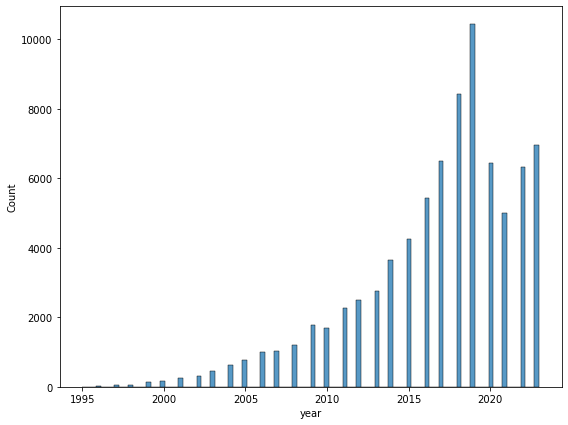

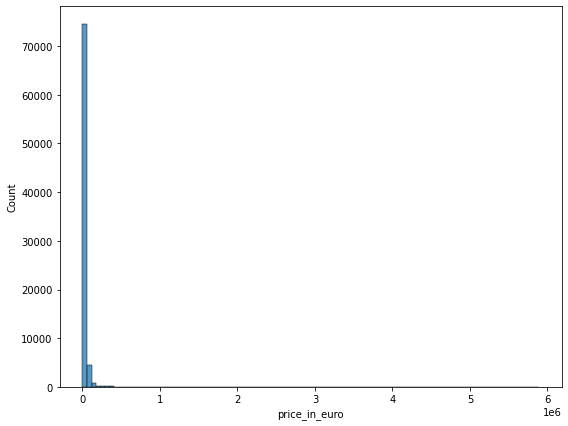

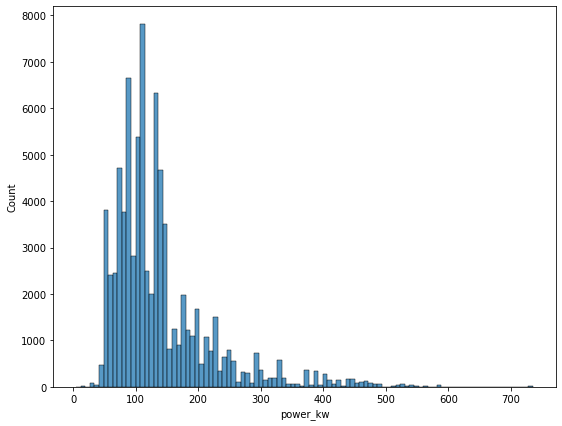

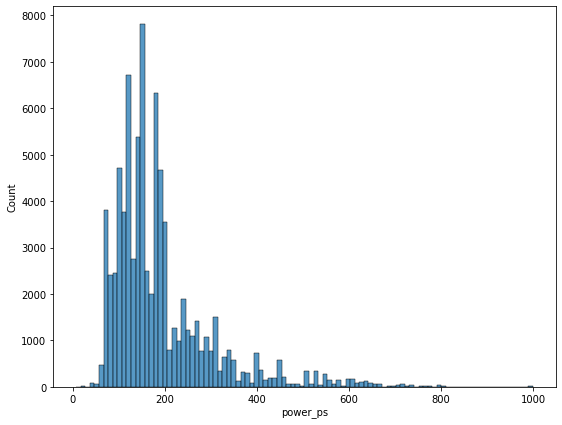

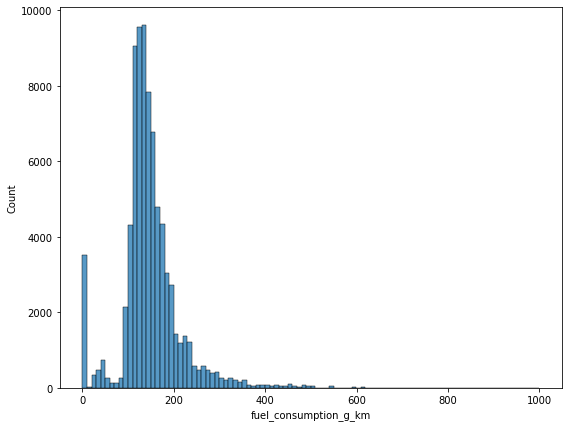

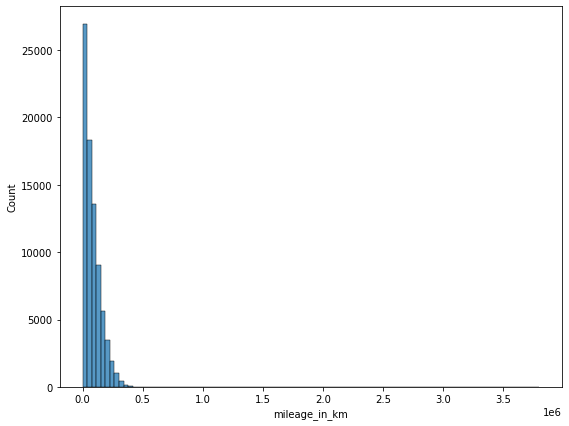

In [62]:
for column in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.histplot(data=df,x=column,bins=100)
    plt.show()

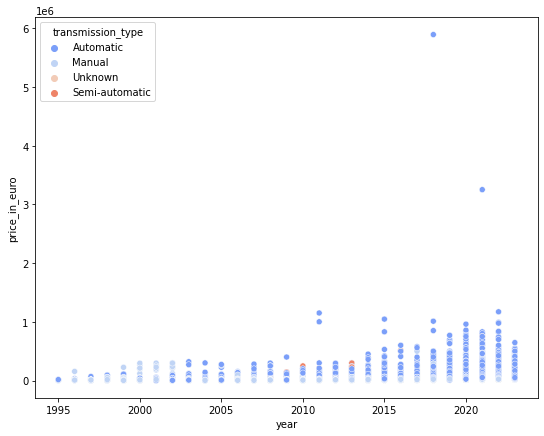

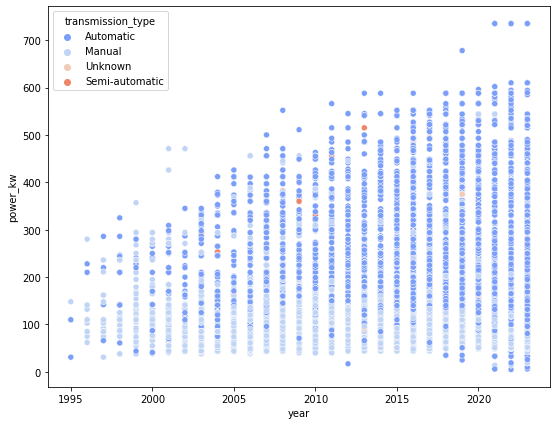

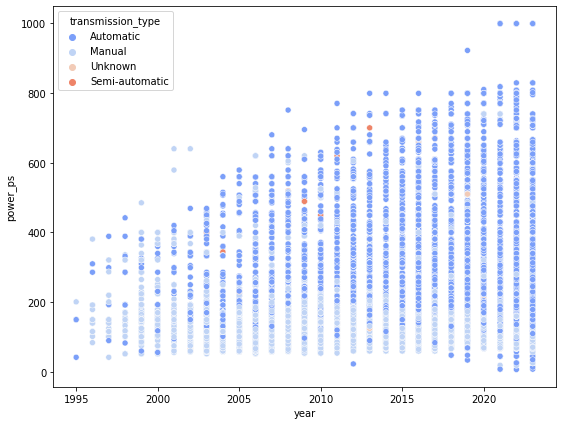

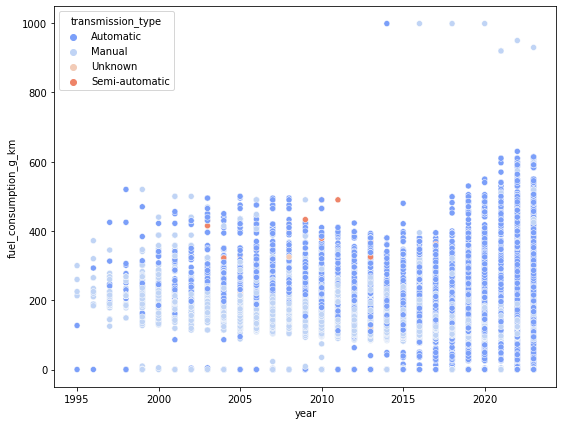

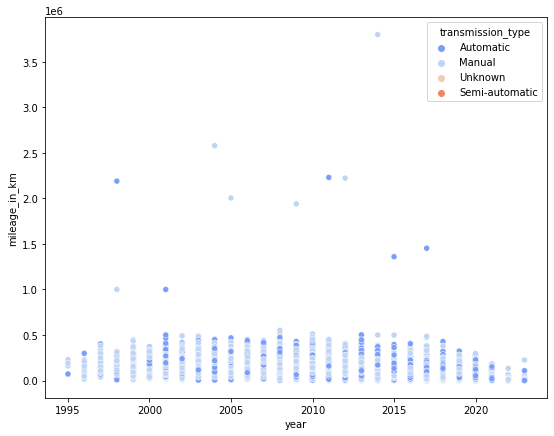

In [63]:
cols1=['price_in_euro','power_kw','power_ps','fuel_consumption_g_km','mileage_in_km']
for column in cols1:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='year',y=column,hue='transmission_type',palette='coolwarm')
    plt.show()

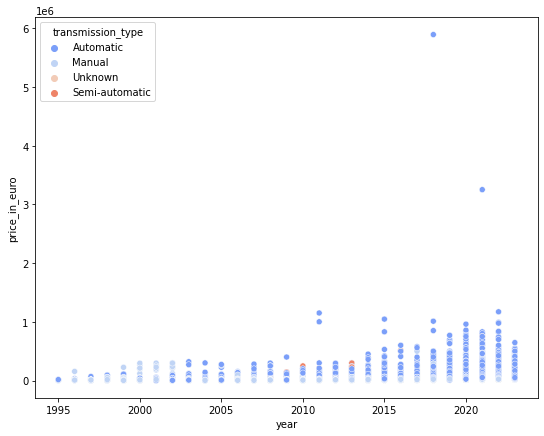

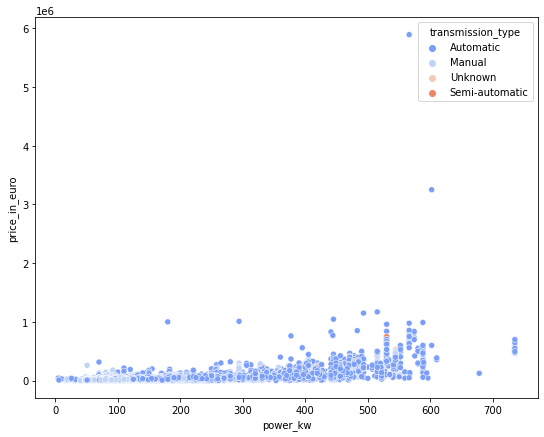

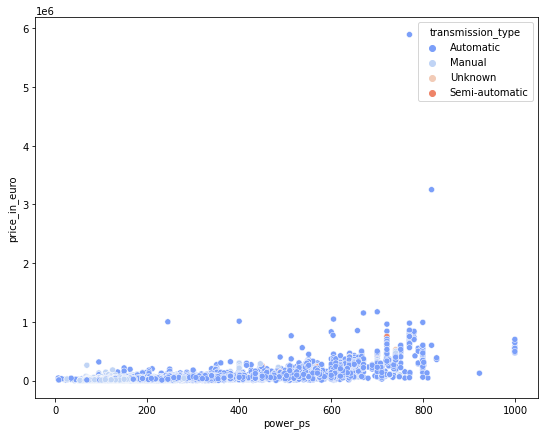

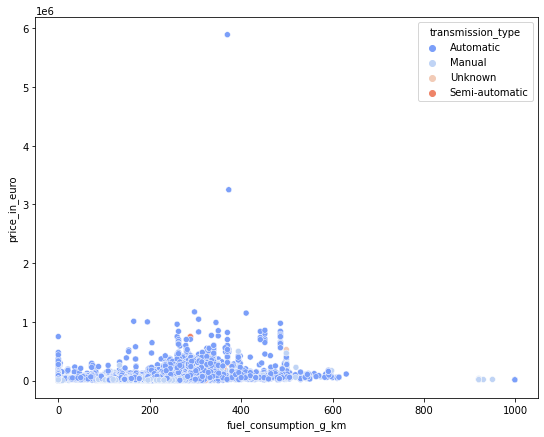

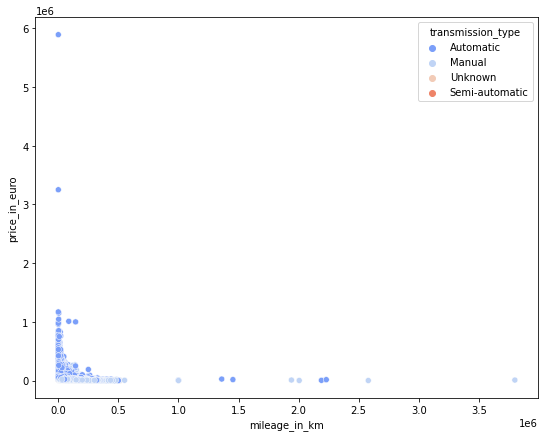

In [64]:
cols2=['year','power_kw','power_ps','fuel_consumption_g_km','mileage_in_km']
for column in cols2:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x=column,y='price_in_euro',hue='transmission_type',palette='coolwarm')
    plt.show()

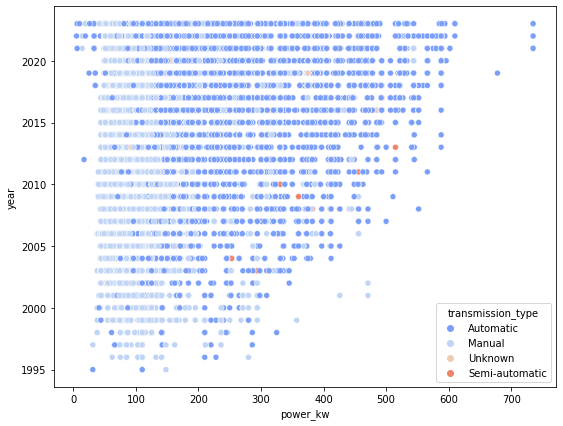

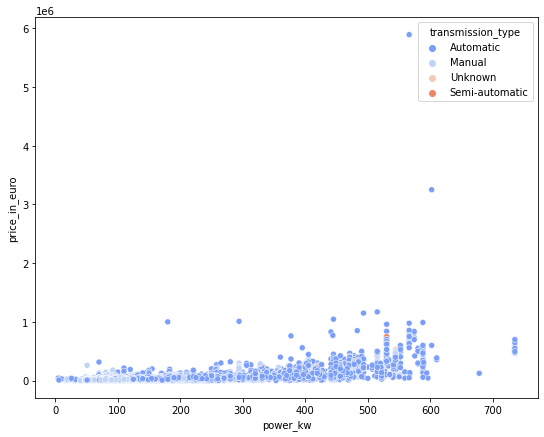

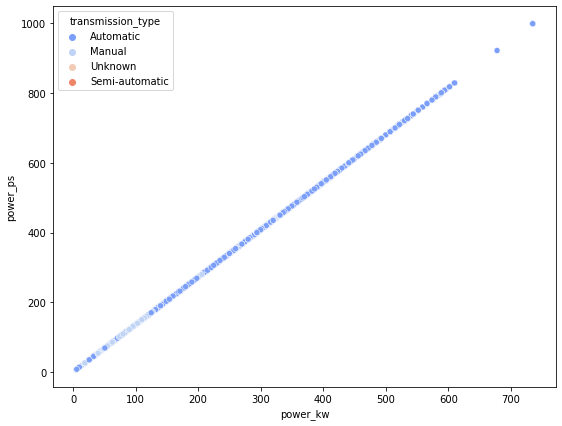

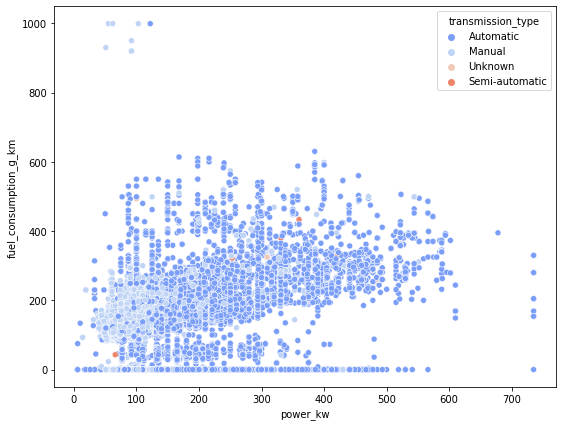

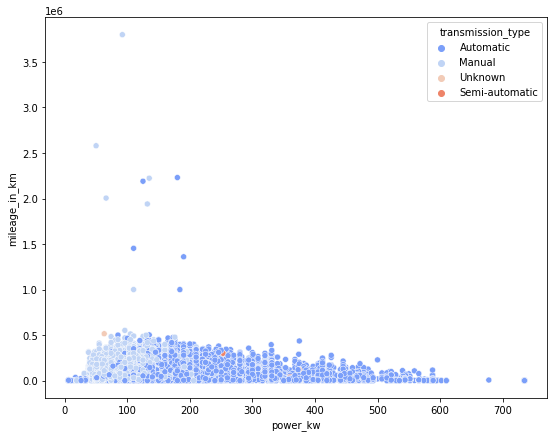

In [65]:
cols3=['year','price_in_euro','power_ps','fuel_consumption_g_km','mileage_in_km']
for column in cols3:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='power_kw',y=column,hue='transmission_type',palette='coolwarm')
    plt.show()

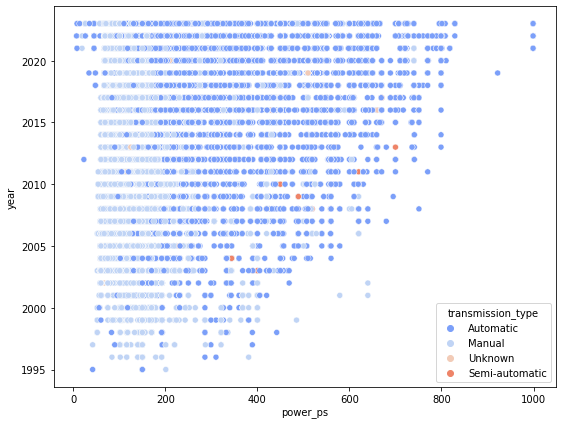

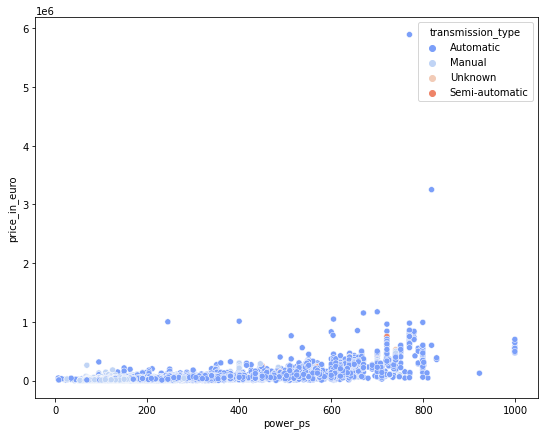

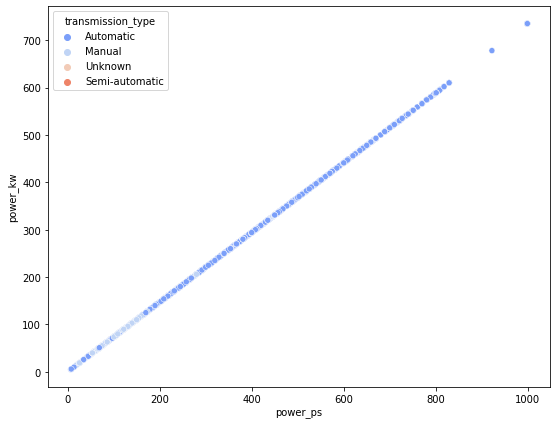

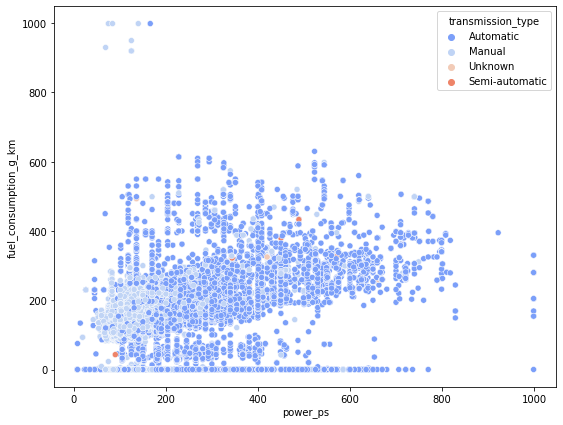

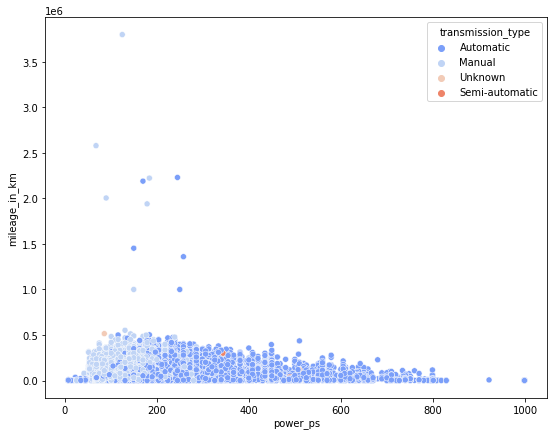

In [66]:
cols4=['year','price_in_euro','power_kw','fuel_consumption_g_km','mileage_in_km']
for column in cols4:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='power_ps',y=column,hue='transmission_type',palette='coolwarm')
    plt.show()

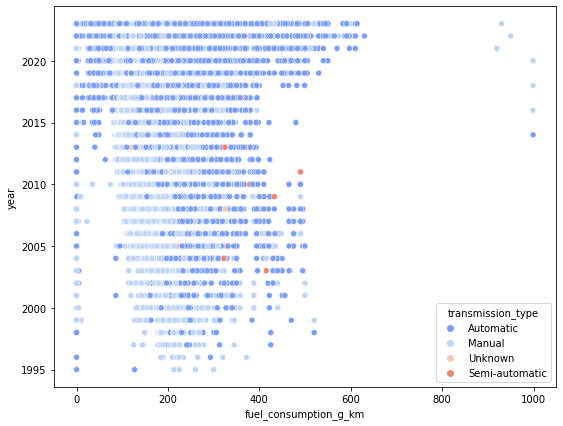

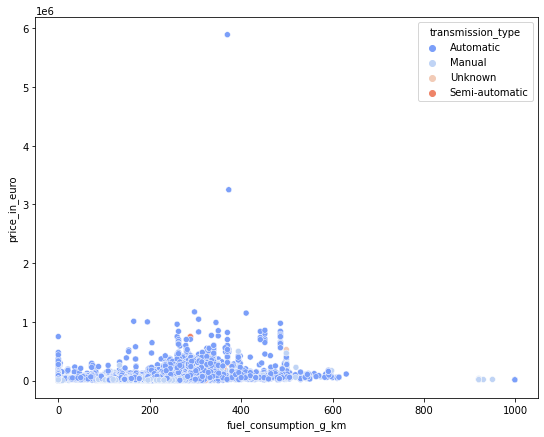

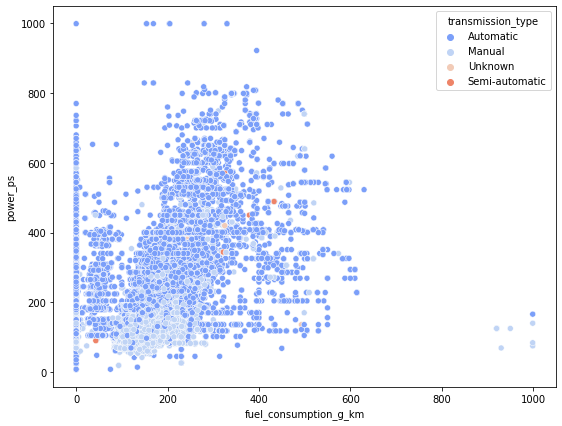

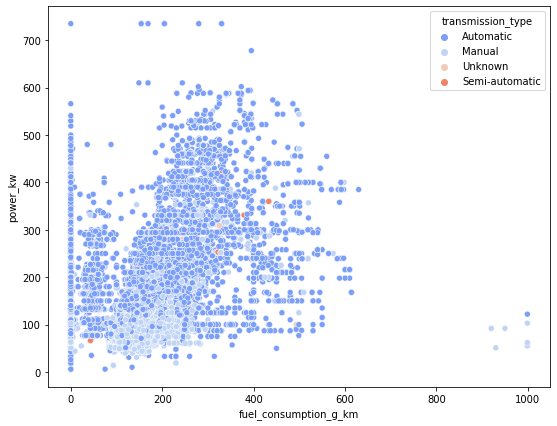

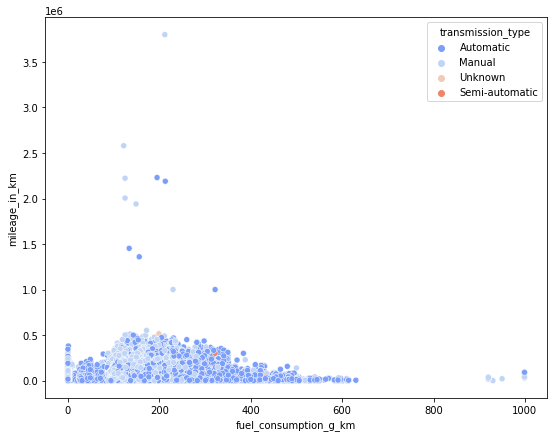

In [67]:
cols5=['year','price_in_euro','power_ps','power_kw','mileage_in_km']
for column in cols5:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='fuel_consumption_g_km',y=column,hue='transmission_type',palette='coolwarm')
    plt.show()

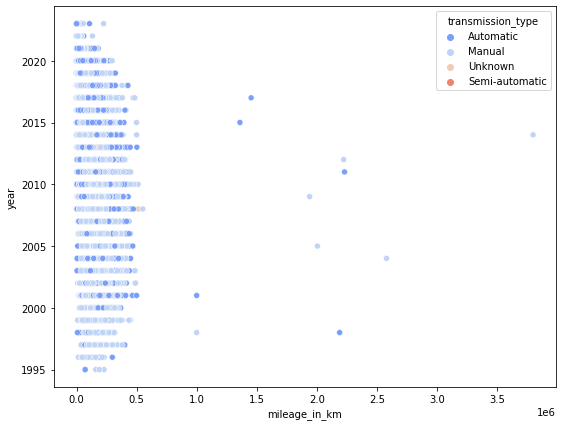

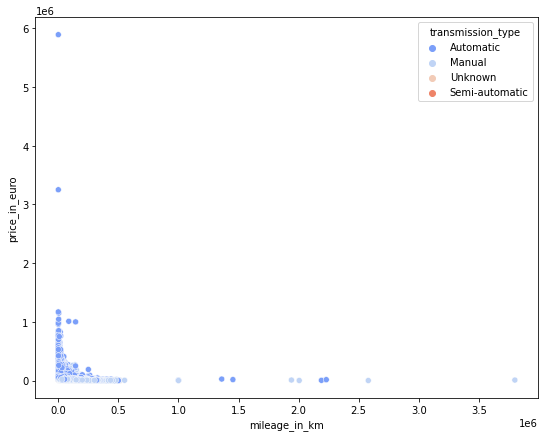

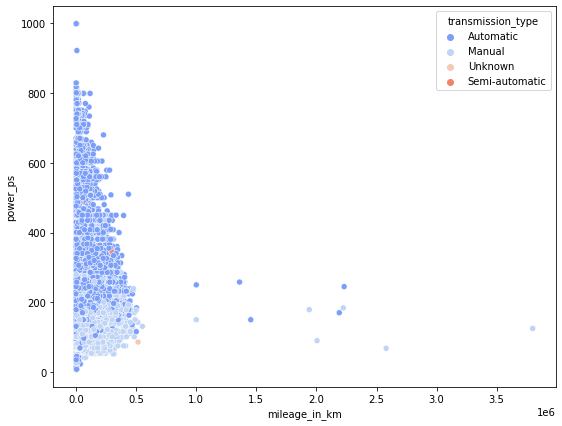

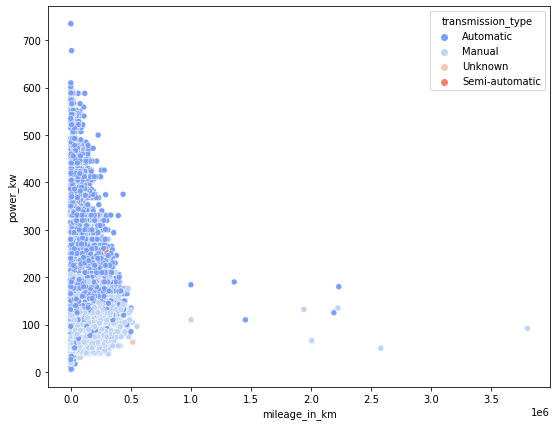

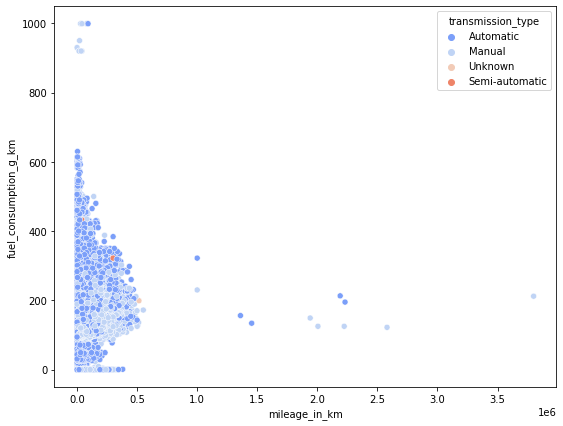

In [68]:
cols6=['year','price_in_euro','power_ps','power_kw','fuel_consumption_g_km']
for column in cols6:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='mileage_in_km',y=column,hue='transmission_type',palette='coolwarm')
    plt.show()

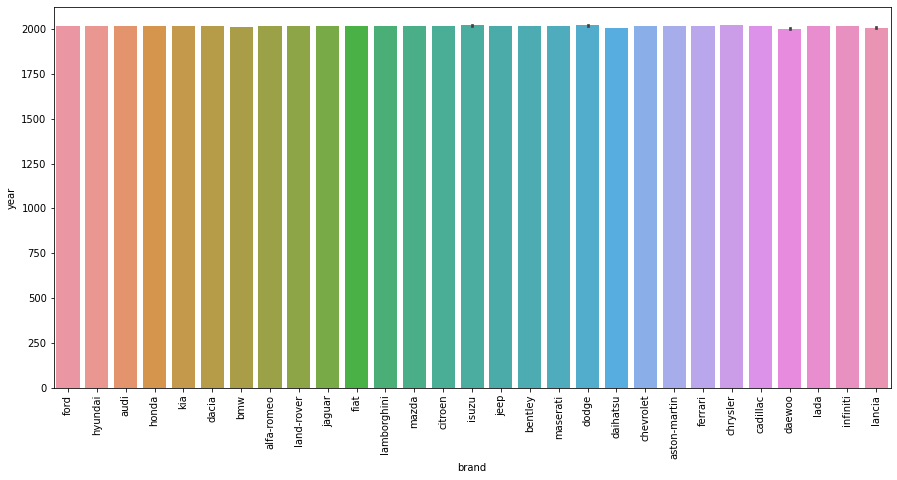

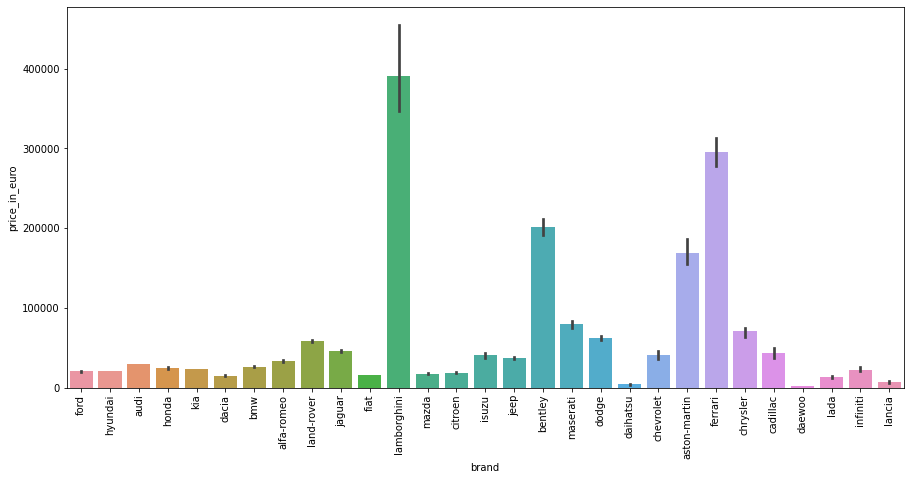

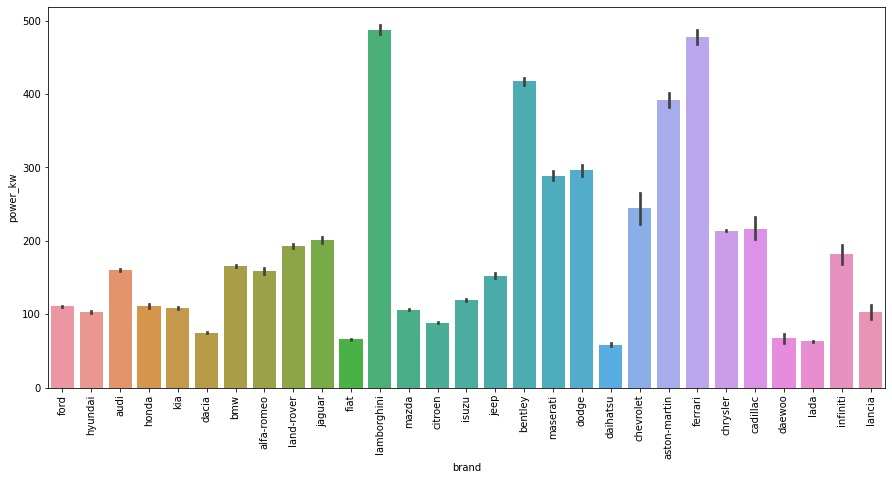

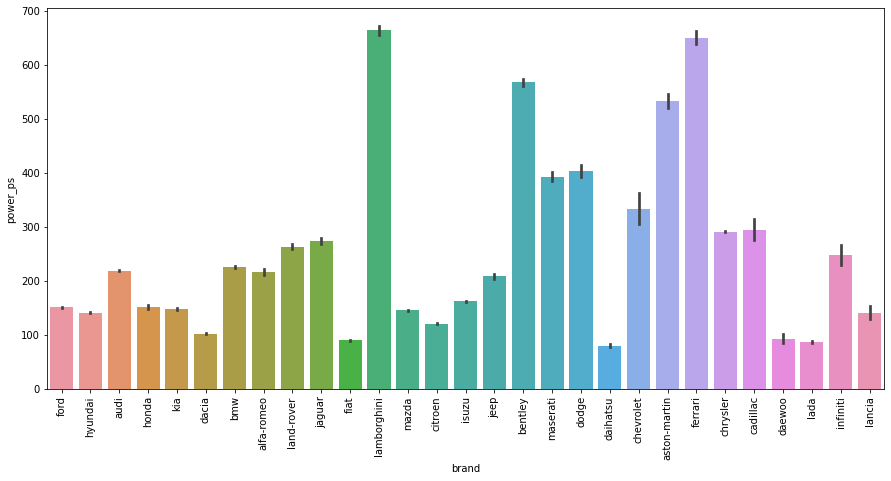

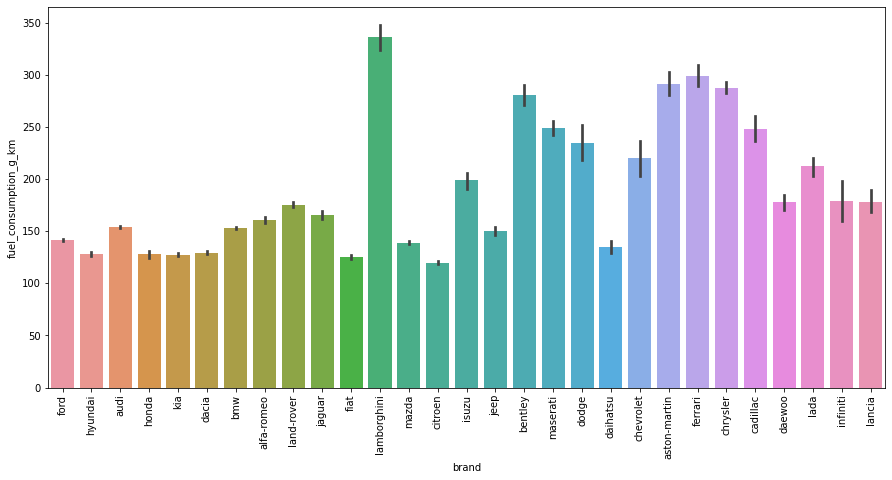

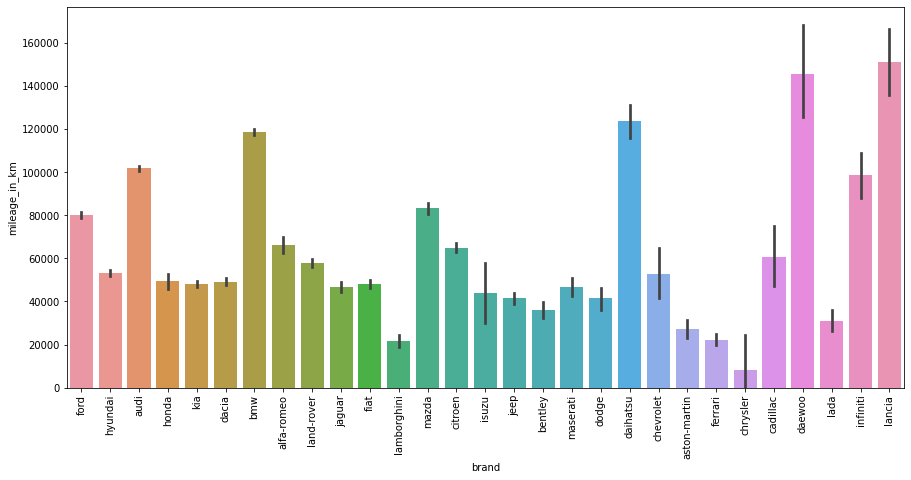

In [69]:
for column in numerical_columns:
    plt.figure(figsize=(15,7))
    sns.barplot(data=df,x='brand',y=column)
    plt.xticks(rotation=90)
    plt.show()

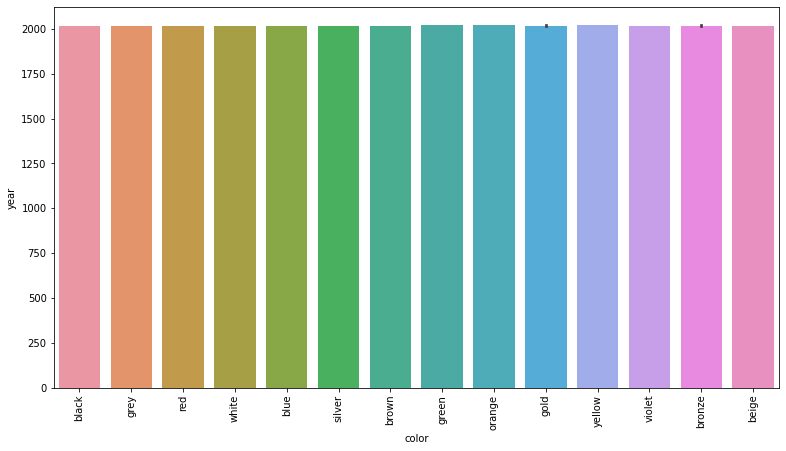

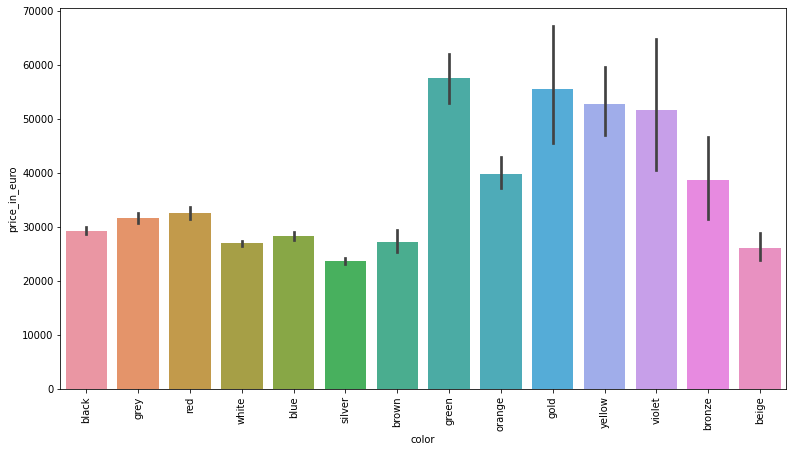

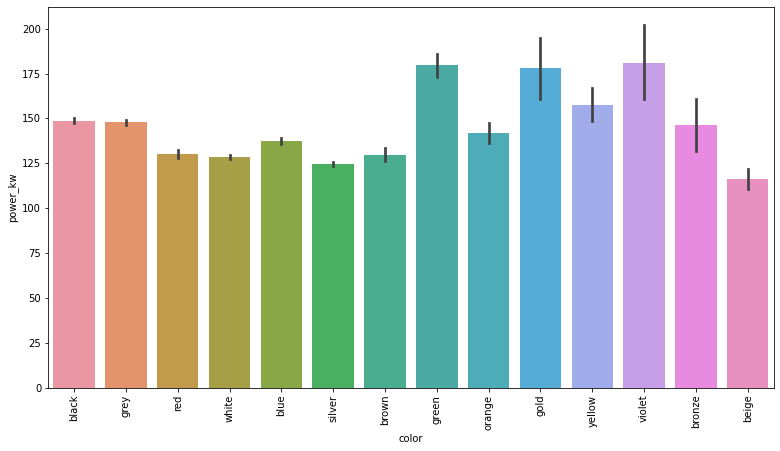

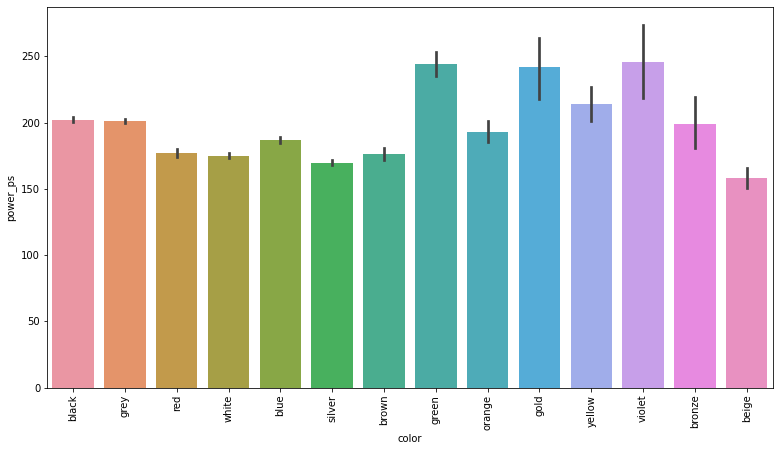

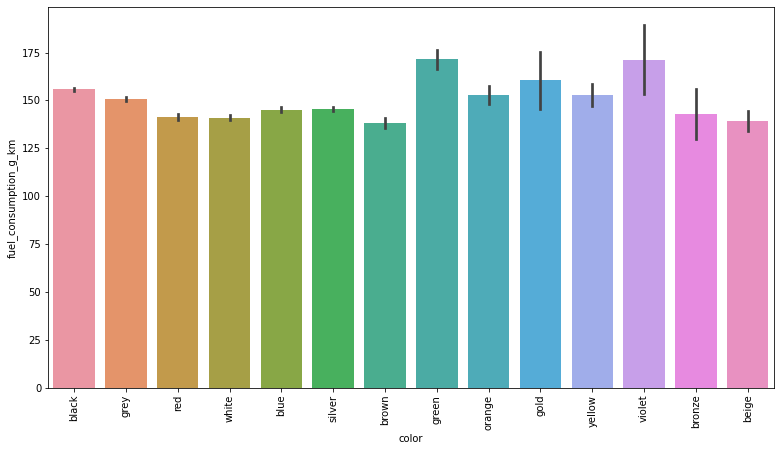

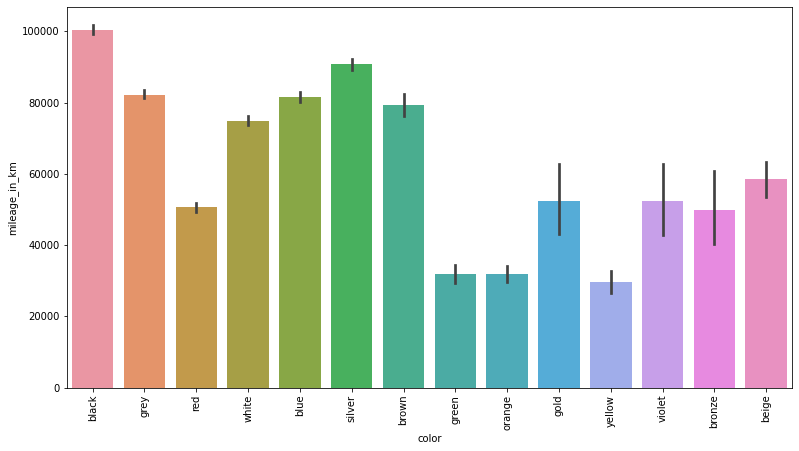

In [70]:
for column in numerical_columns:
    plt.figure(figsize=(13,7))
    sns.barplot(data=df,x='color',y=column)
    plt.xticks(rotation=90)
    plt.show()

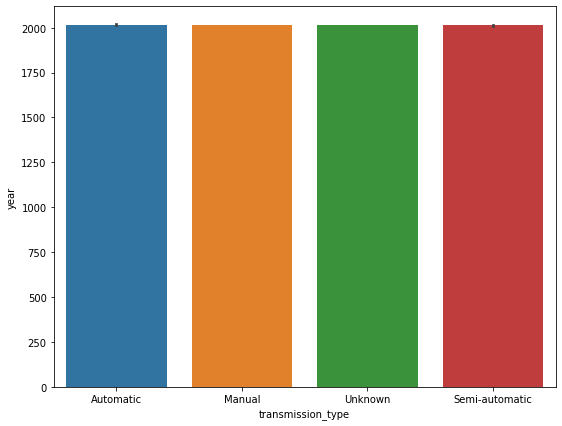

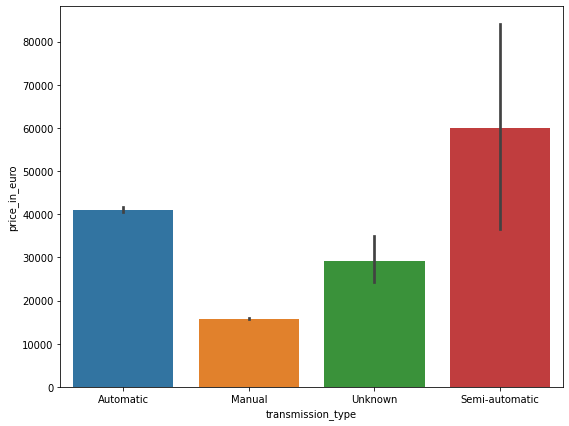

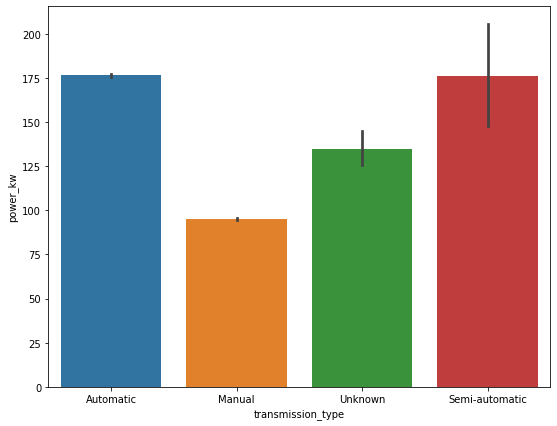

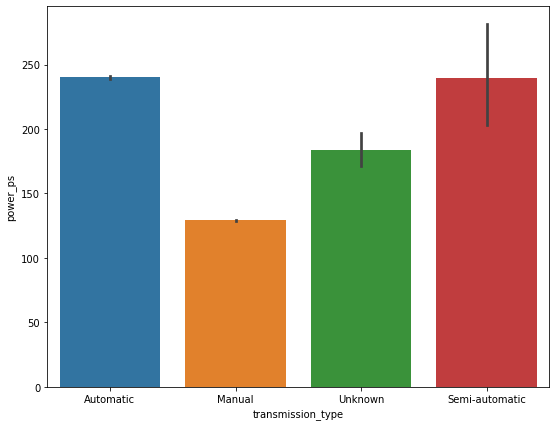

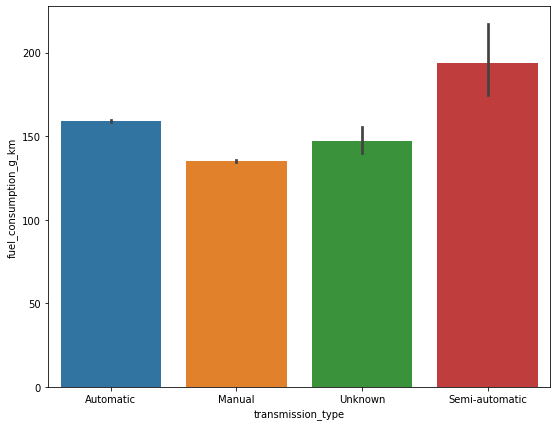

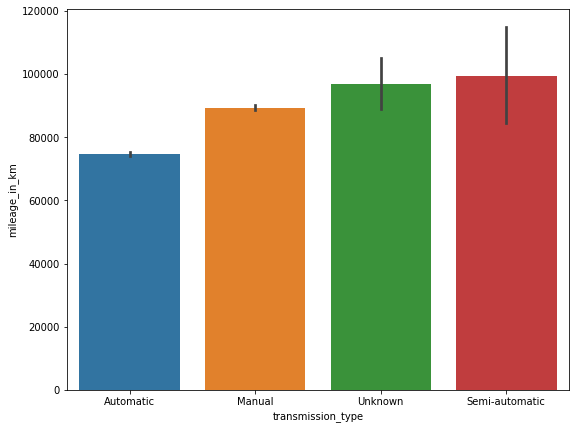

In [71]:
for column in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.barplot(data=df,x='transmission_type',y=column)
    plt.show()

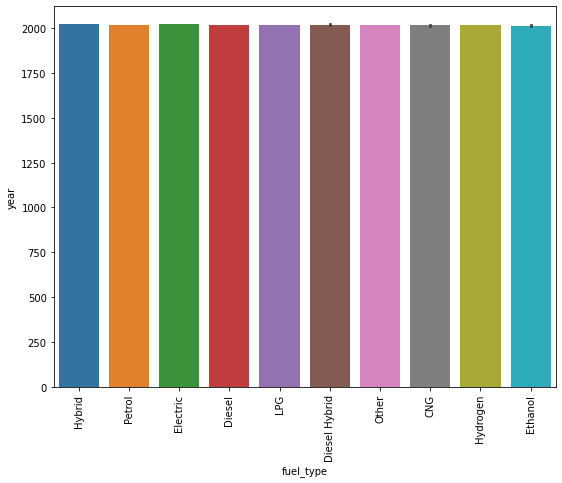

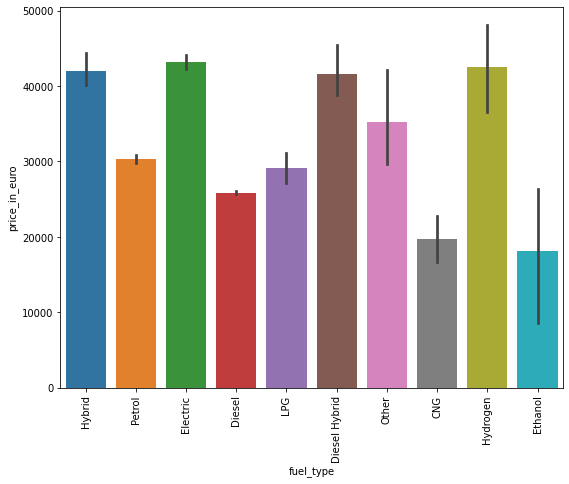

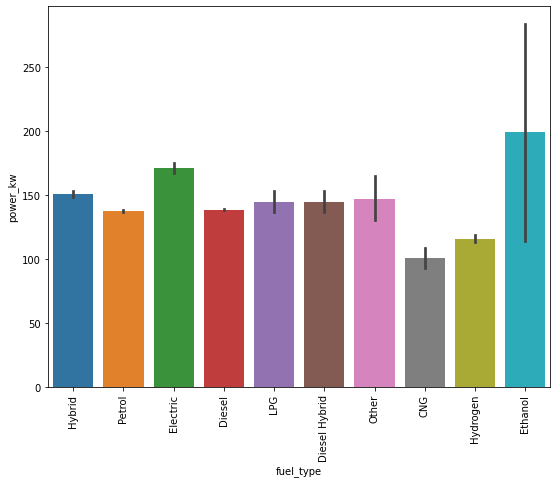

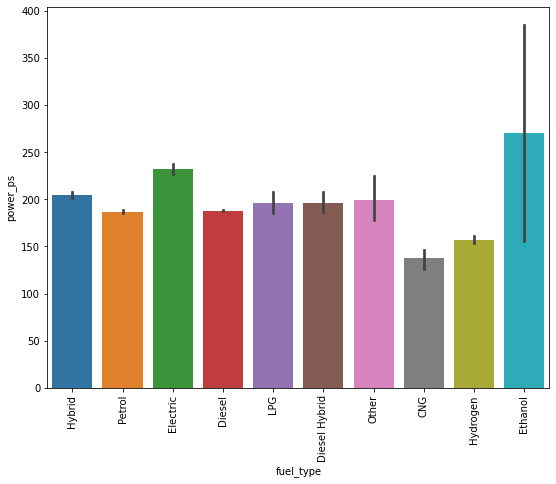

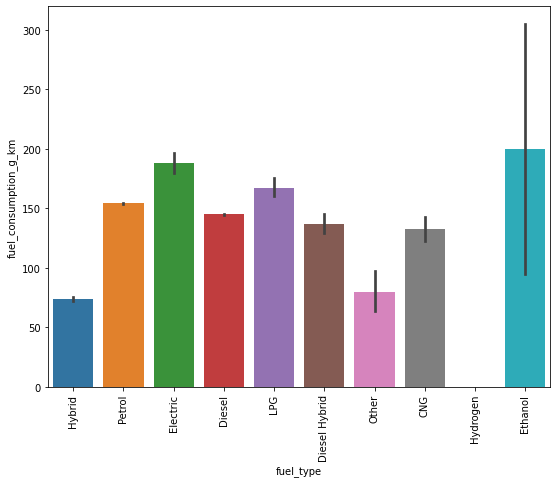

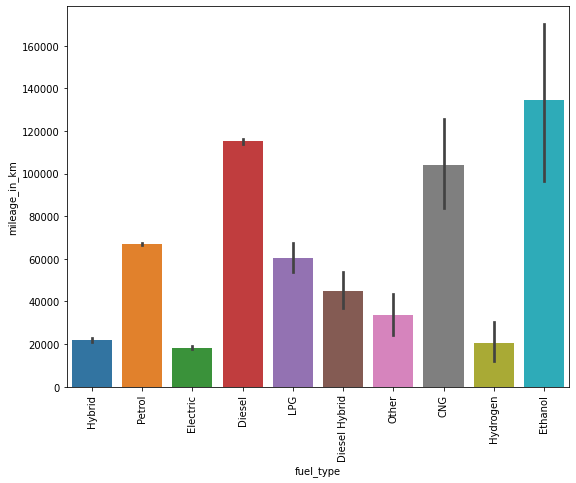

In [72]:
for column in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.barplot(data=df,x='fuel_type',y=column)
    plt.xticks(rotation=90)
    plt.show()

In [73]:
categorical_columns=[]
for column in df.columns:
    if df[column].dtypes=='object':
        categorical_columns.append(column)

In [74]:
categorical_columns

['brand', 'color', 'transmission_type', 'fuel_type']

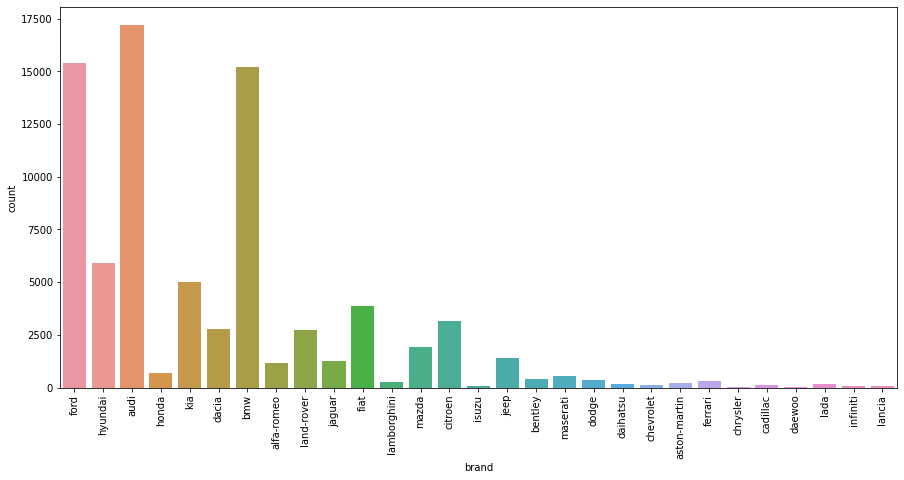

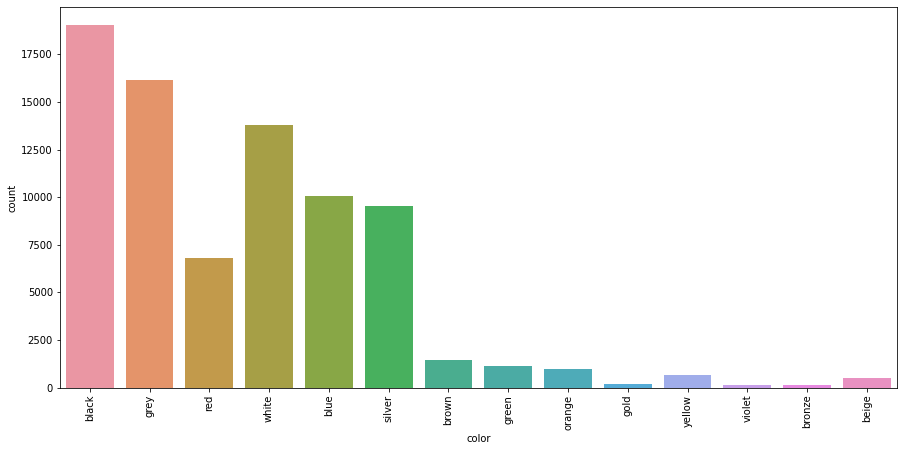

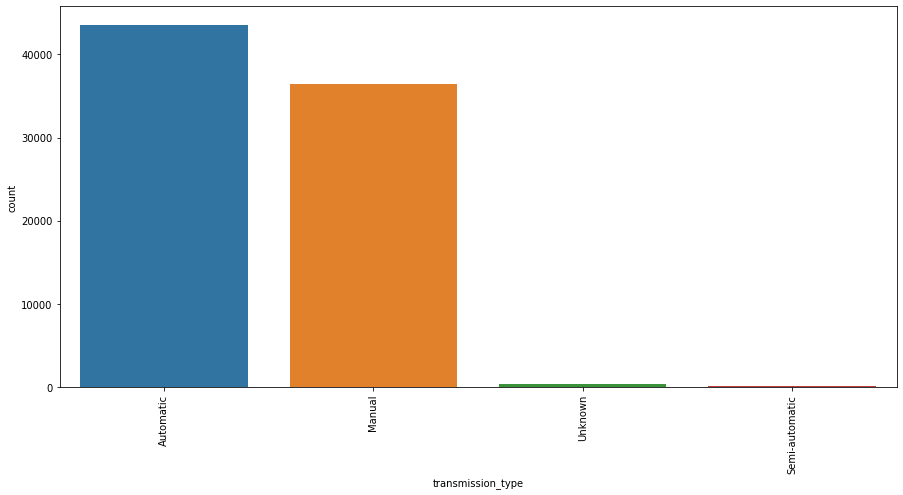

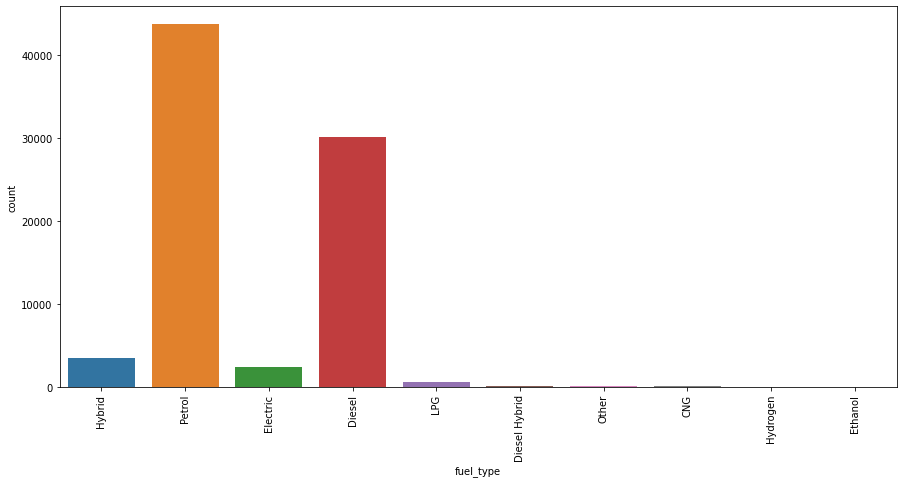

In [75]:
for column in categorical_columns:
    plt.figure(figsize=(15,7))
    sns.countplot(data=df,x=column)
    plt.xticks(rotation=90)
    plt.show()

In [76]:
df[df['fuel_type']=='Ethanol'].shape

(5, 10)

In [77]:
df[df['fuel_type']=='Other'].shape

(61, 10)

In [78]:
df[df['fuel_type']=='Hydrogen'].shape

(28, 10)

In [79]:
df[df['fuel_type']=='CNG'].shape

(41, 10)

In [80]:
df[df['fuel_type']=='Diesel Hybrid'].shape

(122, 10)

In [81]:
df[df['fuel_type']=='LPG'].shape

(622, 10)

In [82]:
d=['Ethanol','Hydrogen','CNG','Diesel Hybrid','LPG']
for i in d:
    df['fuel_type']=df['fuel_type'].replace(i,'Other')

In [83]:
df['fuel_type'].value_counts()

fuel_type
Petrol      43656
Diesel      30118
Hybrid       3485
Electric     2404
Other         879
Name: count, dtype: int64

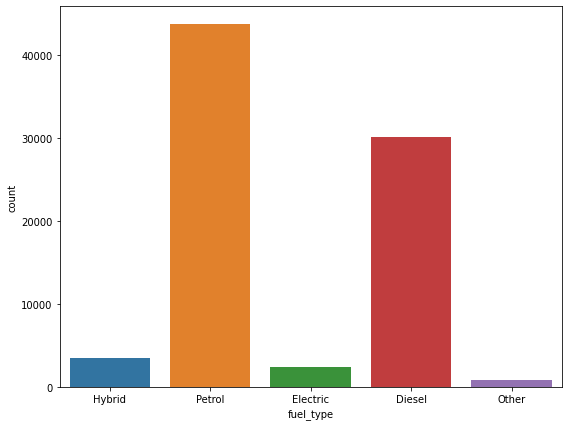

In [84]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='fuel_type')
plt.show()

In [85]:
df[df['transmission_type']=='Semi-automatic'].shape

(96, 10)

In [86]:
df[df['transmission_type']=='Unknown'].shape

(373, 10)

In [87]:
df=df[df['transmission_type']!='Semi-automatic']
df=df[df['transmission_type']!='Unknown']

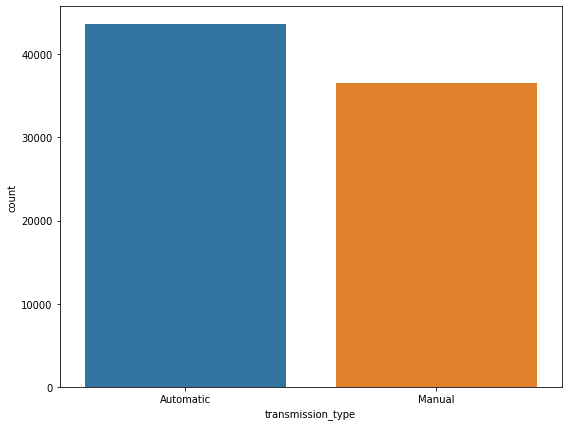

In [88]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='transmission_type')
plt.show()

In [89]:
df[df['color']=='violet'].shape

(113, 10)

In [90]:
df[df['color']=='bronze'].shape

(125, 10)

In [91]:
df[df['color']=='gold'].shape

(169, 10)

In [92]:
e=['violet','bronze','gold']
for i in e:
    df=df[df['color']!=i]

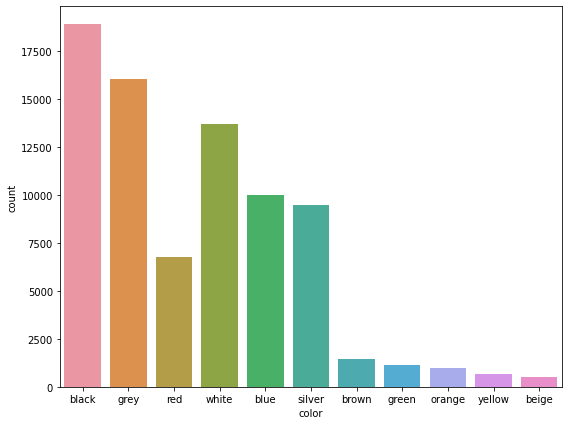

In [93]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='color')
plt.show()

In [94]:
df['brand'].value_counts()

brand
audi            17101
ford            15210
bmw             15055
hyundai          5847
kia              4945
fiat             3814
citroen          3140
dacia            2739
land-rover       2674
mazda            1905
jeep             1398
jaguar           1239
alfa-romeo       1126
honda             657
maserati          525
bentley           380
dodge             339
ferrari           316
lamborghini       252
aston-martin      210
lada              146
daihatsu          142
cadillac          109
chevrolet          96
isuzu              93
infiniti           79
lancia             77
daewoo             39
chrysler           13
Name: count, dtype: int64

In [95]:
f=['chevrolet','isuzu','infiniti','lancia','daewoo','chrysler']
for i in f:
    df['brand']=df['brand'].replace(i,'Other')

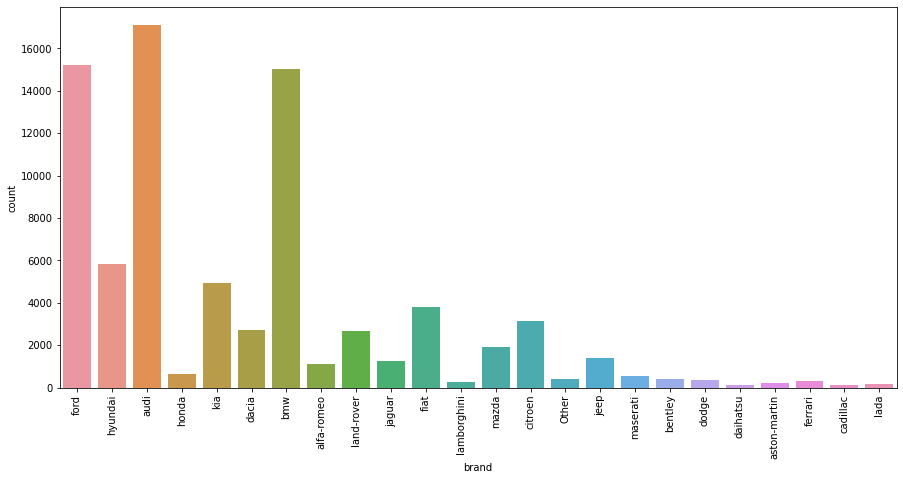

In [96]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x='brand')
plt.show()

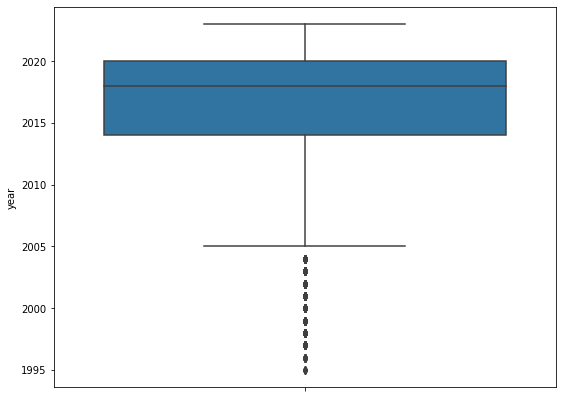

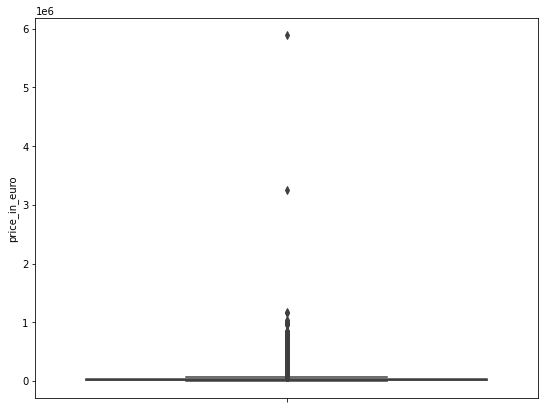

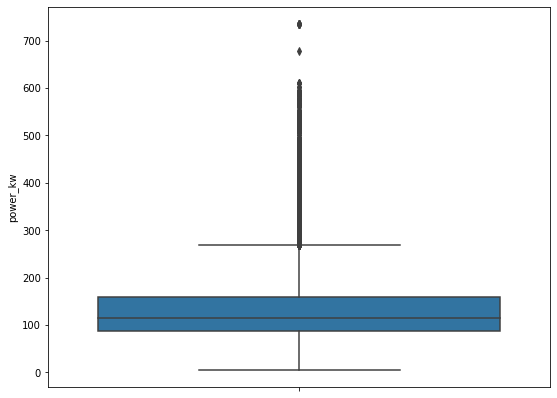

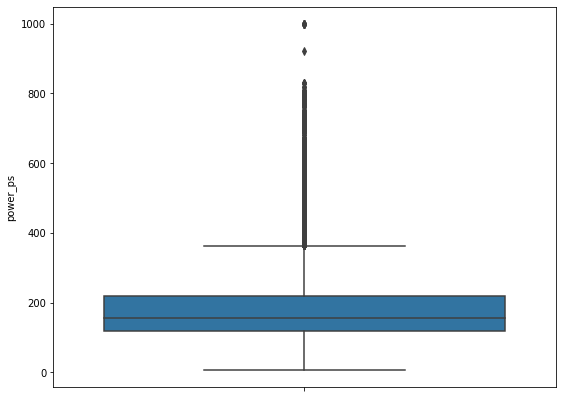

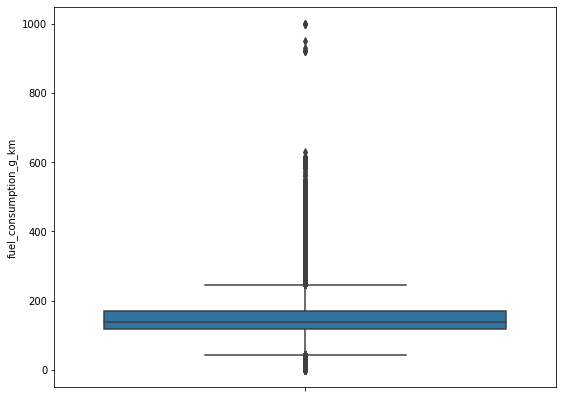

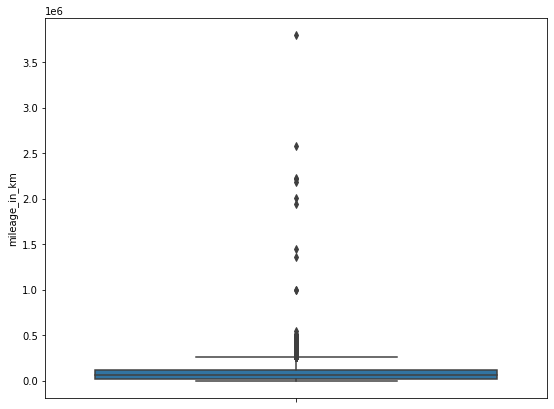

In [97]:
for column in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.boxplot(data=df,y=column)
    plt.show()

In [98]:
df[df['year']<2005].shape

(2040, 10)

In [99]:
df=df[df['year']>2005]

In [100]:
df[df['price_in_euro']>100000].shape

(1906, 10)

In [101]:
df=df[df['price_in_euro']<100000]

In [102]:
df[df['power_kw']>250].shape

(4576, 10)

In [103]:
df=df[df['power_kw']<250]

In [104]:
df[df['power_ps']>340].shape

(0, 10)

In [105]:
df[df['fuel_consumption_g_km']>230].shape

(1826, 10)

In [106]:
df=df[df['fuel_consumption_g_km']<230]

In [107]:
df[df['fuel_consumption_g_km']<50].shape

(4389, 10)

In [108]:
df=df[df['fuel_consumption_g_km']>50]

In [109]:
df[df['mileage_in_km']>200000].shape

(4037, 10)

In [110]:
df=df[df['mileage_in_km']<200000]

In [111]:
df.shape

(59133, 10)

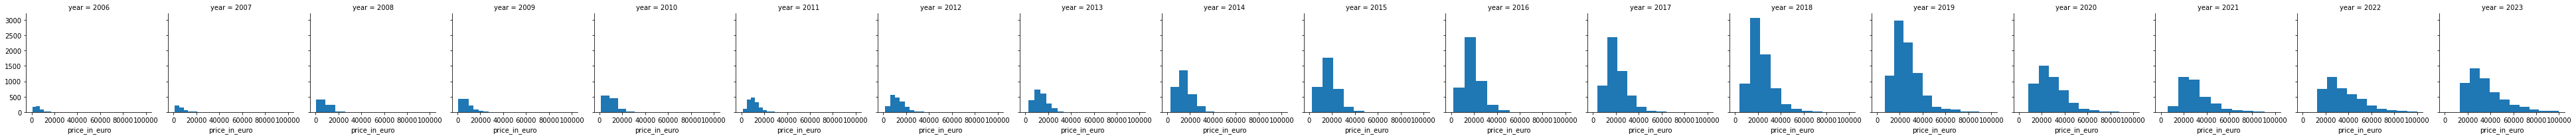

In [112]:
g=sns.FacetGrid(df,col='year')
g.map(plt.hist,'price_in_euro')
plt.show()

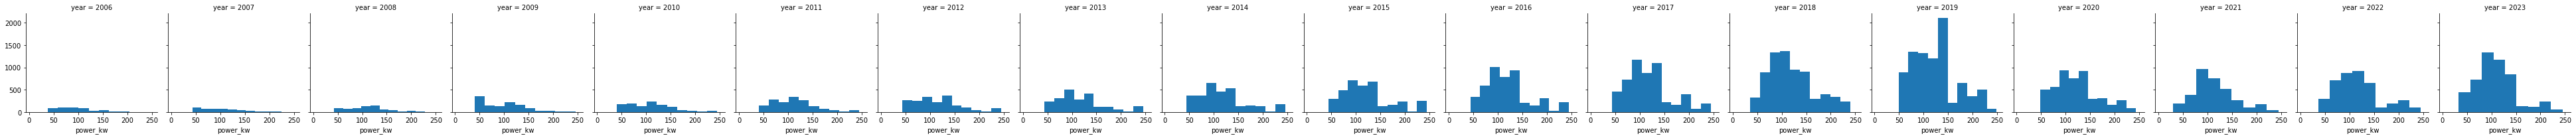

In [113]:
g=sns.FacetGrid(df,col='year')
g.map(plt.hist,'power_kw')
plt.show()

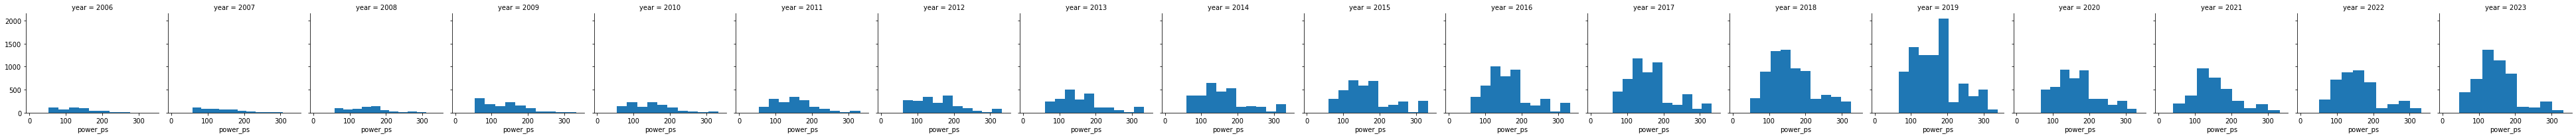

In [114]:
g=sns.FacetGrid(df,col='year')
g.map(plt.hist,'power_ps')
plt.show()

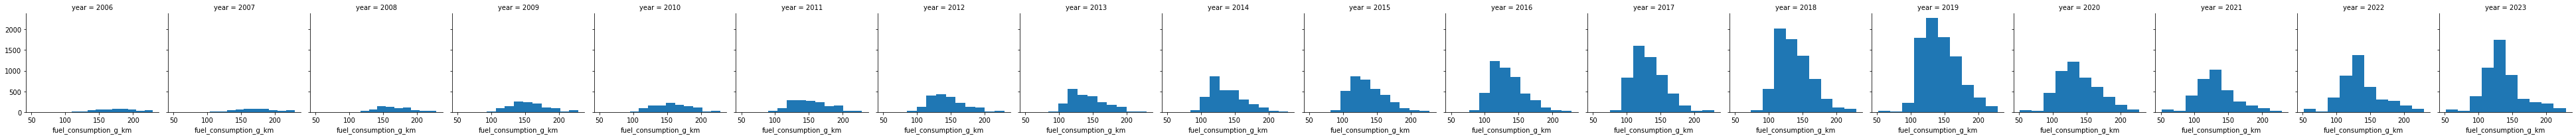

In [115]:
g=sns.FacetGrid(df,col='year')
g.map(plt.hist,'fuel_consumption_g_km')
plt.show()

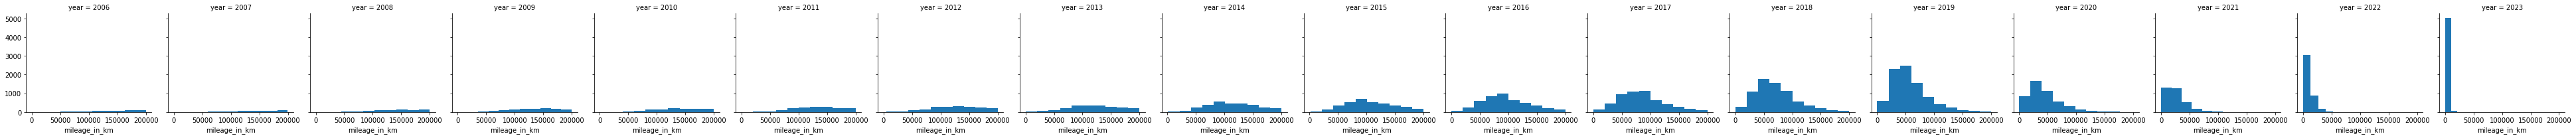

In [116]:
g=sns.FacetGrid(df,col='year')
g.map(plt.hist,'mileage_in_km')
plt.show()

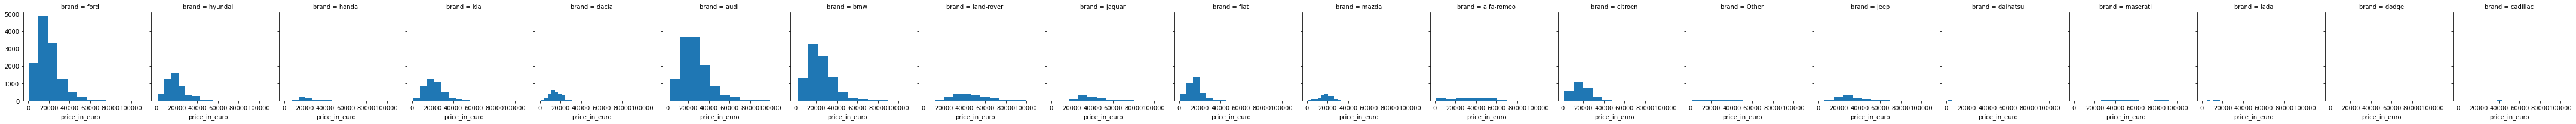

In [117]:
g=sns.FacetGrid(df,col='brand')
g.map(plt.hist,'price_in_euro')
plt.show()

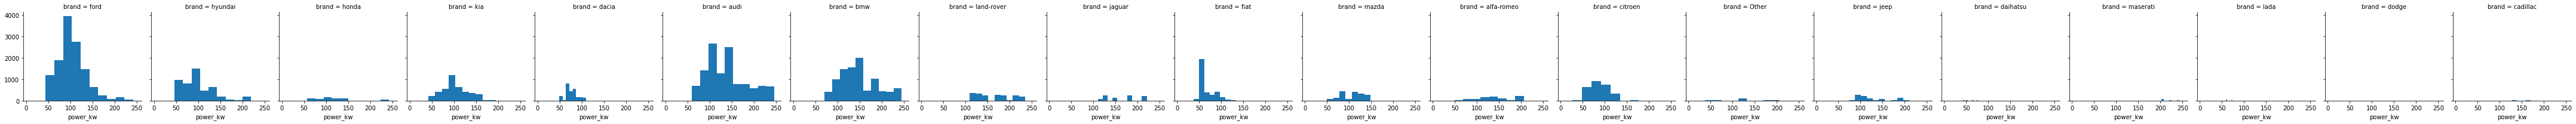

In [118]:
g=sns.FacetGrid(df,col='brand')
g.map(plt.hist,'power_kw')
plt.show()

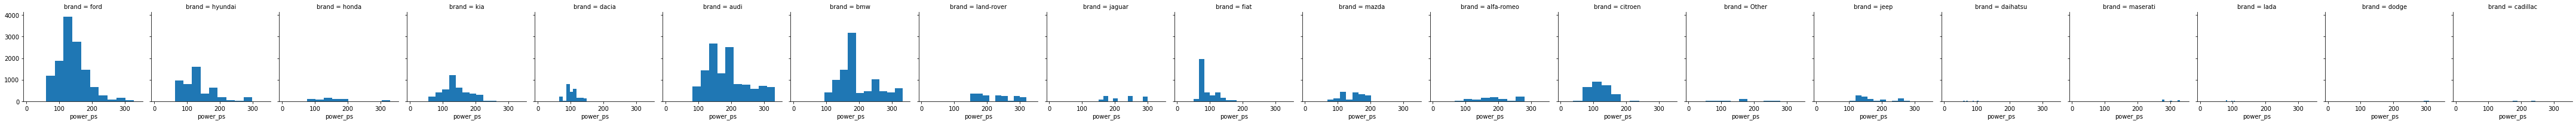

In [119]:
g=sns.FacetGrid(df,col='brand')
g.map(plt.hist,'power_ps')
plt.show()

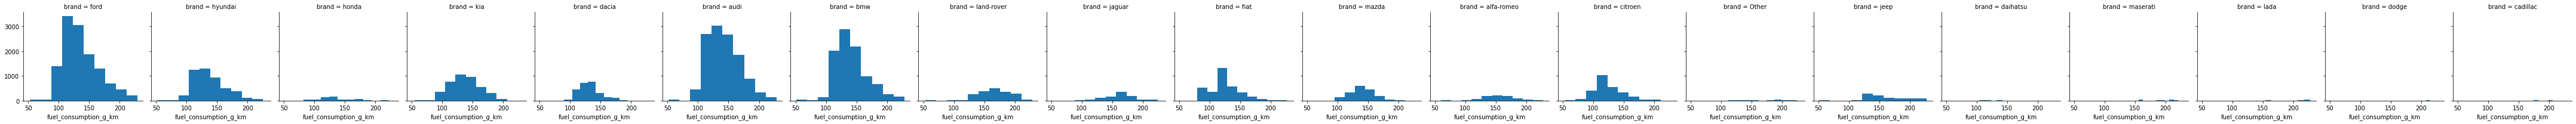

In [120]:
g=sns.FacetGrid(df,col='brand')
g.map(plt.hist,'fuel_consumption_g_km')
plt.show()

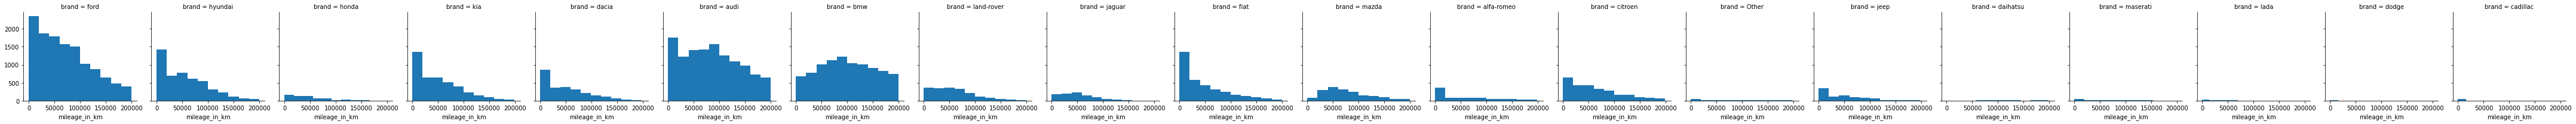

In [121]:
g=sns.FacetGrid(df,col='brand')
g.map(plt.hist,'mileage_in_km')
plt.show()

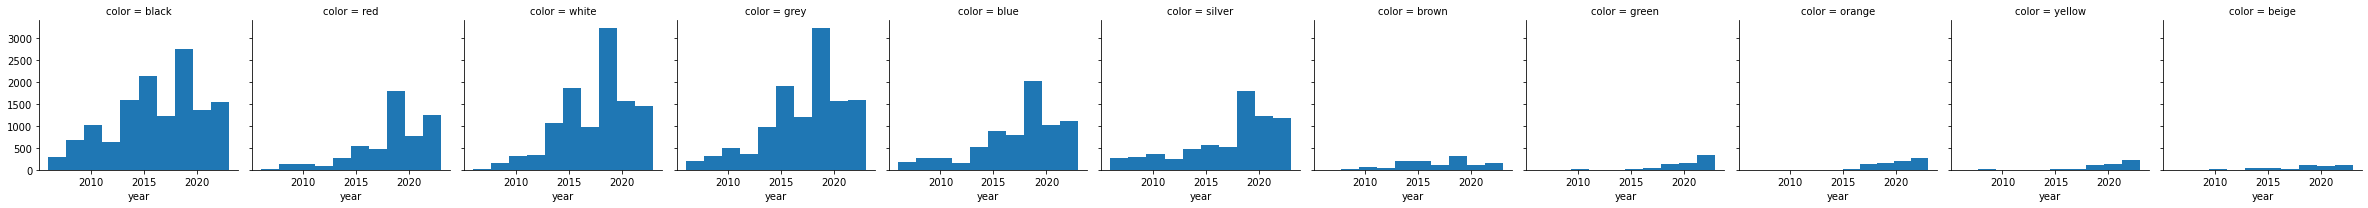

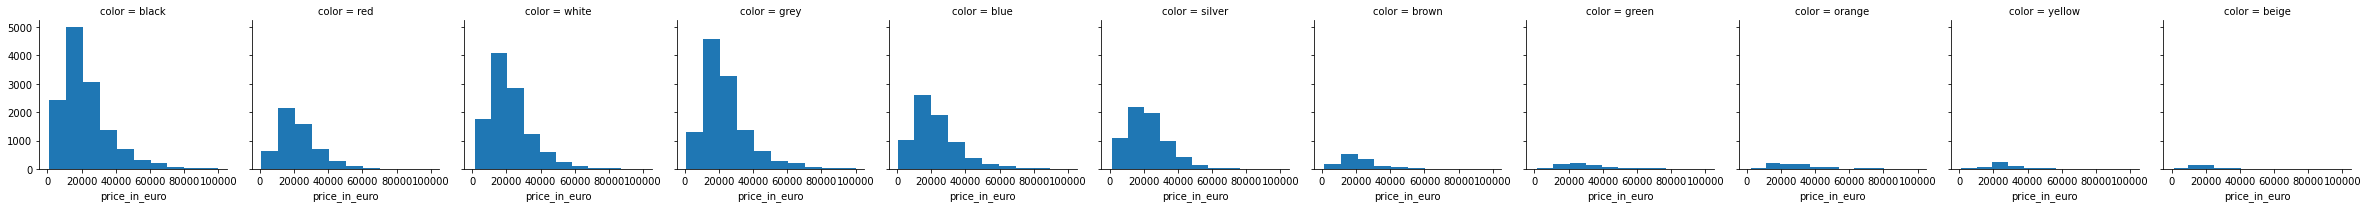

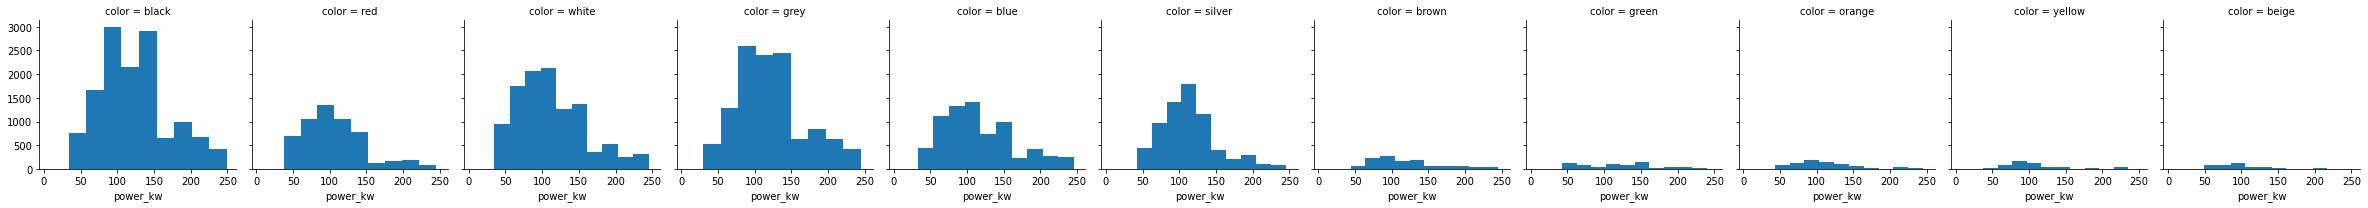

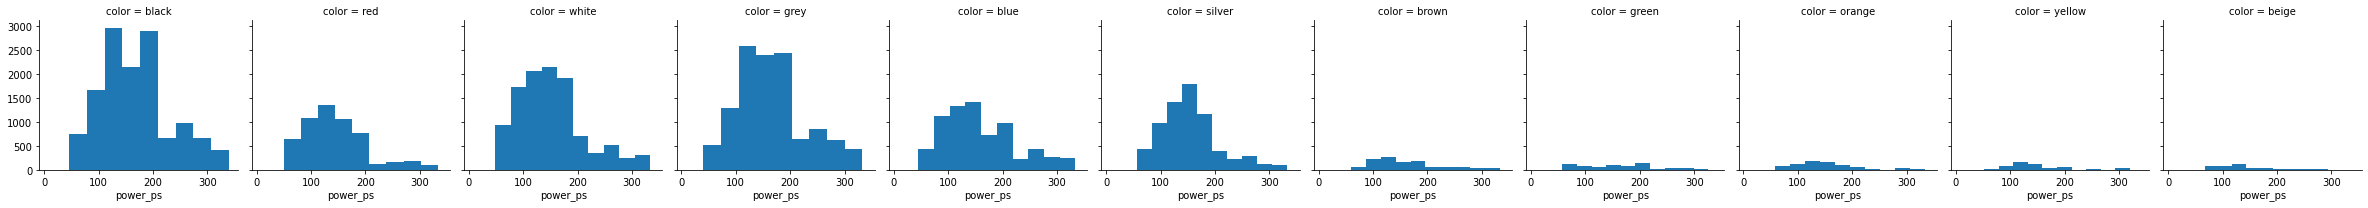

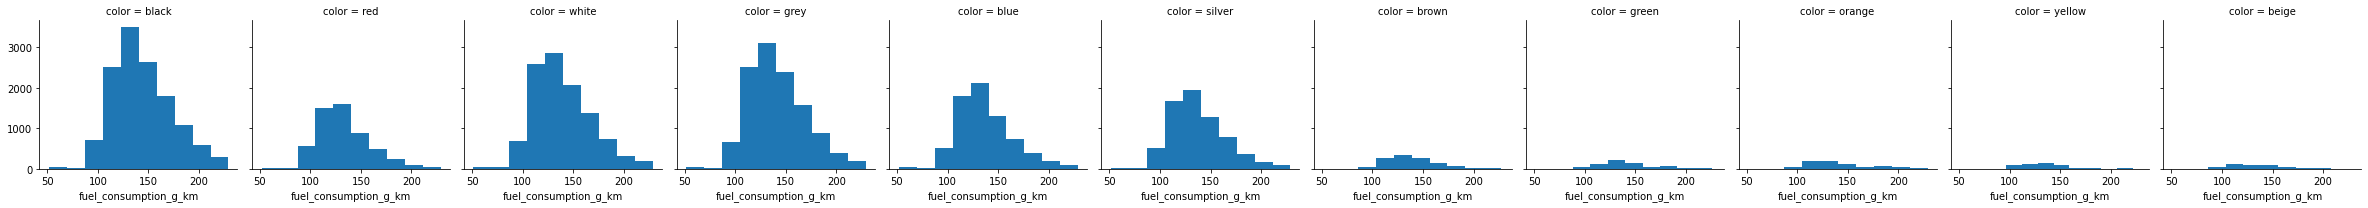

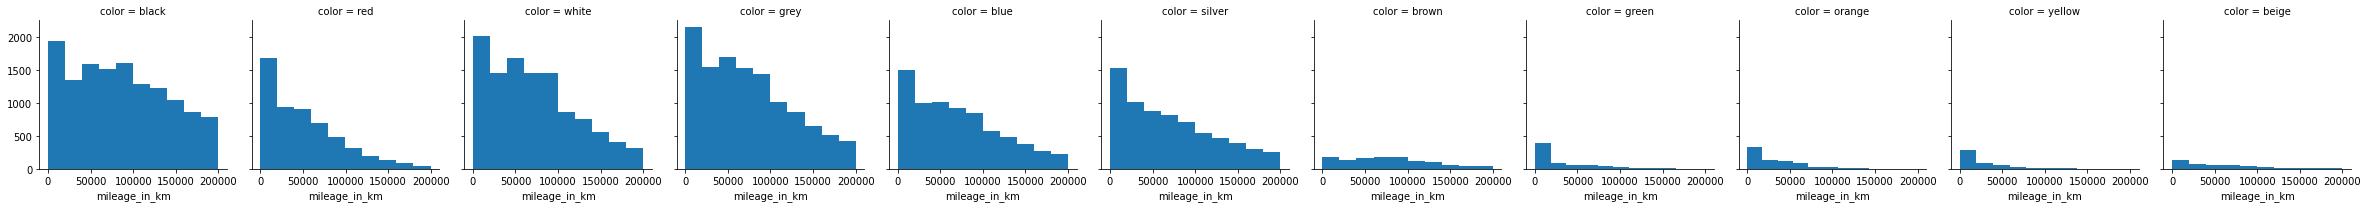

In [122]:
for column in numerical_columns:
    g=sns.FacetGrid(df,col='color')
    g.map(plt.hist,column)
    plt.show()

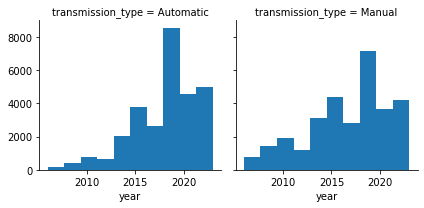

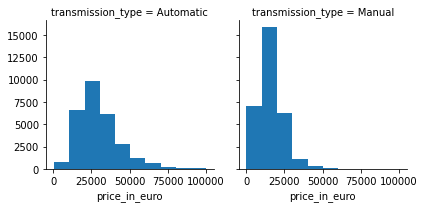

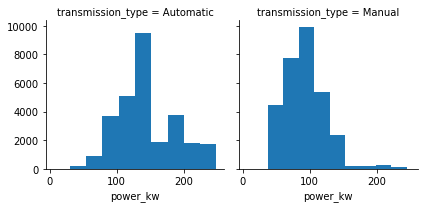

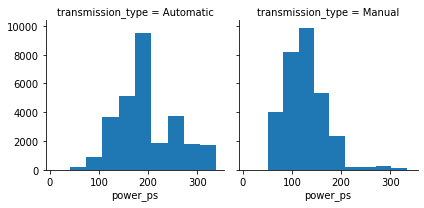

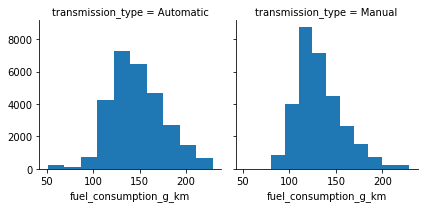

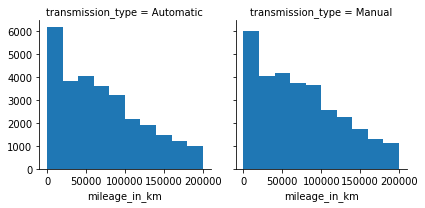

In [123]:
for column in numerical_columns:
    g=sns.FacetGrid(df,col='transmission_type')
    g.map(plt.hist,column)
    plt.show()

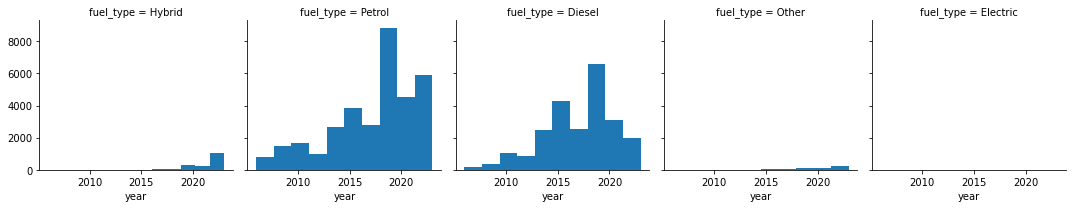

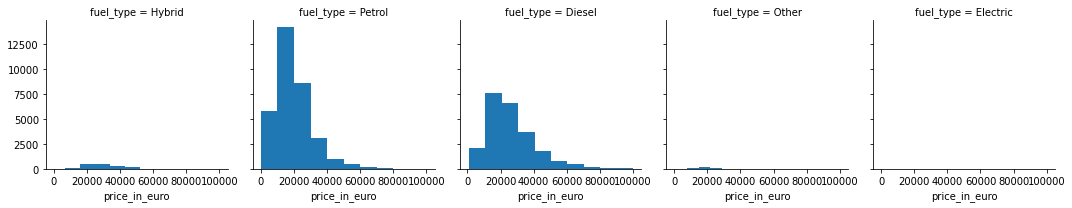

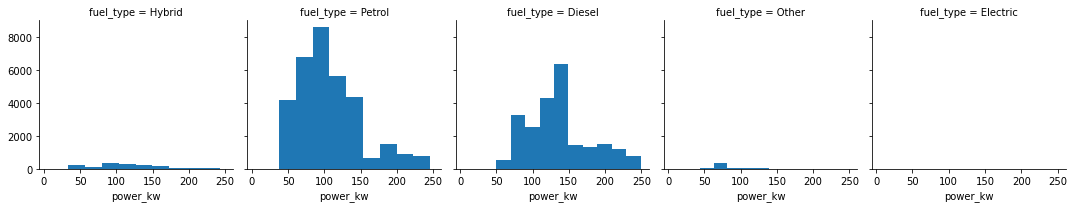

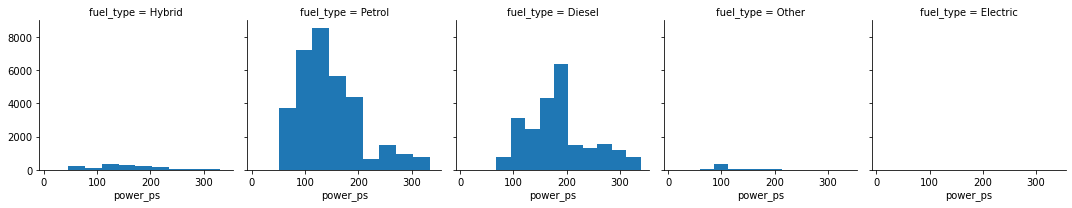

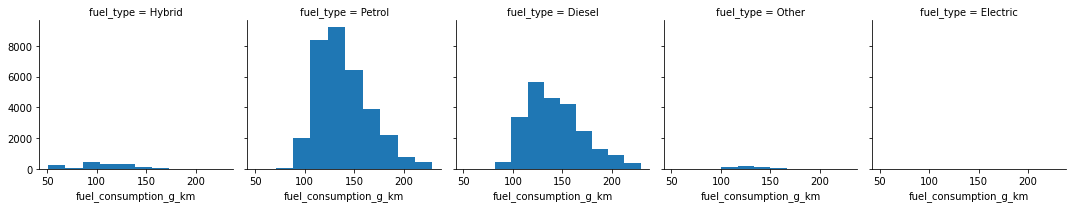

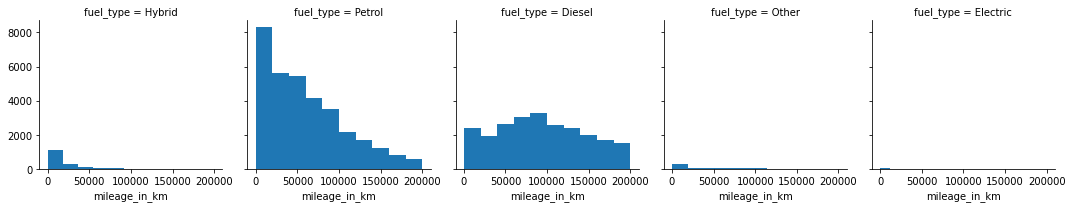

In [124]:
for column in numerical_columns:
    g=sns.FacetGrid(df,col='fuel_type')
    g.map(plt.hist,column)
    plt.show()

<Figure size 648x504 with 0 Axes>

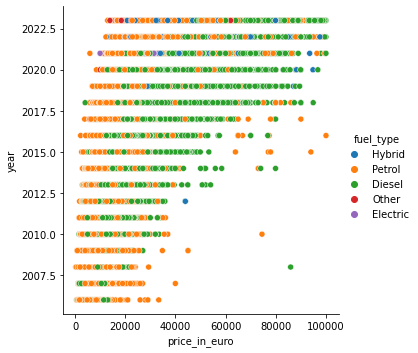

In [125]:
plt.figure(figsize=(9,7))
sns.relplot(data=df,x='price_in_euro',y='year',hue='fuel_type')
plt.show()

<Figure size 648x504 with 0 Axes>

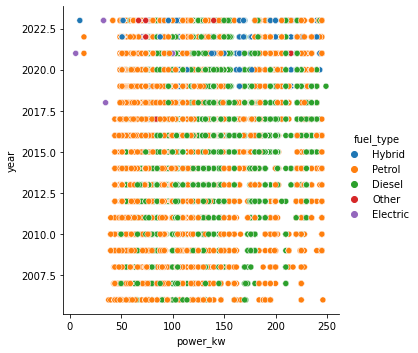

In [126]:
plt.figure(figsize=(9,7))
sns.relplot(data=df,x='power_kw',y='year',hue='fuel_type')
plt.show()

<Figure size 648x504 with 0 Axes>

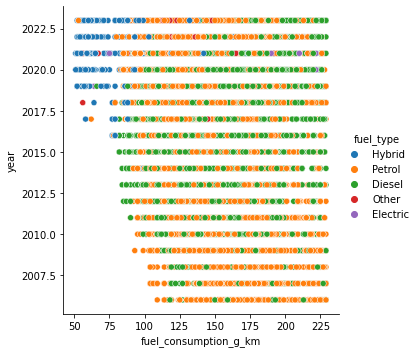

In [127]:
plt.figure(figsize=(9,7))
sns.relplot(data=df,x='fuel_consumption_g_km',y='year',hue='fuel_type')
plt.show()

<Figure size 648x504 with 0 Axes>

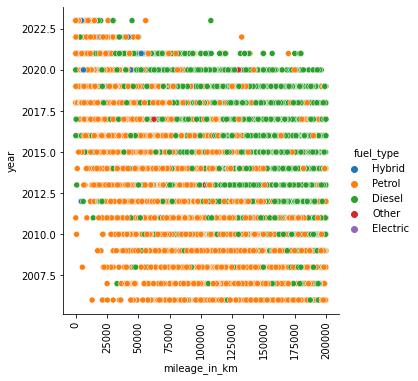

In [128]:
plt.figure(figsize=(9,7))
sns.relplot(data=df,x='mileage_in_km',y='year',hue='fuel_type')
plt.xticks(rotation=90)
plt.show()

<Figure size 648x504 with 0 Axes>

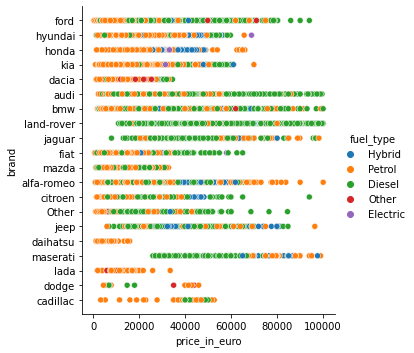

<Figure size 648x504 with 0 Axes>

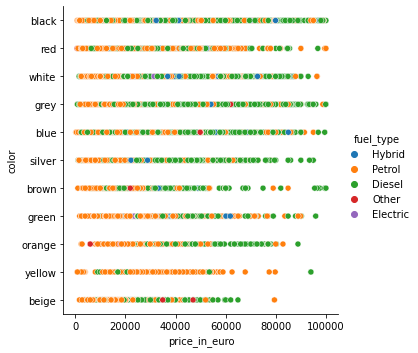

<Figure size 648x504 with 0 Axes>

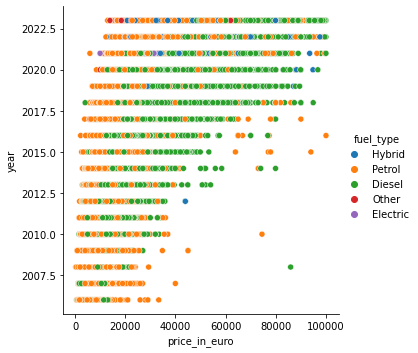

<Figure size 648x504 with 0 Axes>

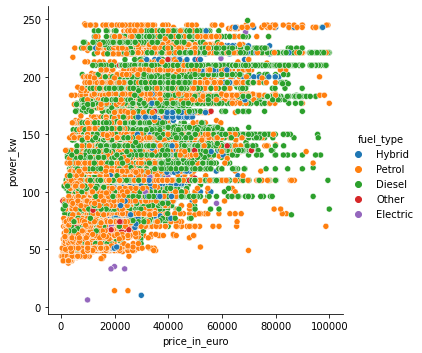

<Figure size 648x504 with 0 Axes>

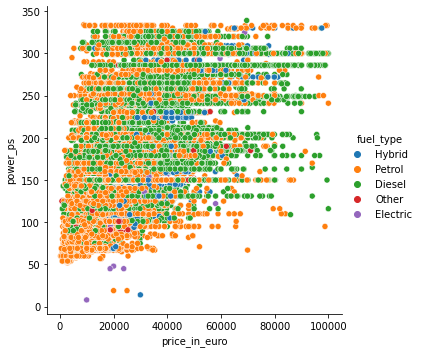

<Figure size 648x504 with 0 Axes>

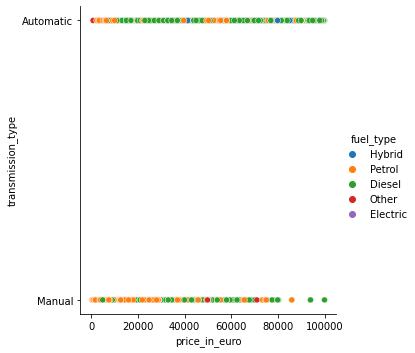

<Figure size 648x504 with 0 Axes>

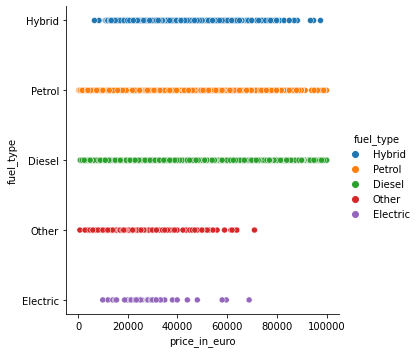

<Figure size 648x504 with 0 Axes>

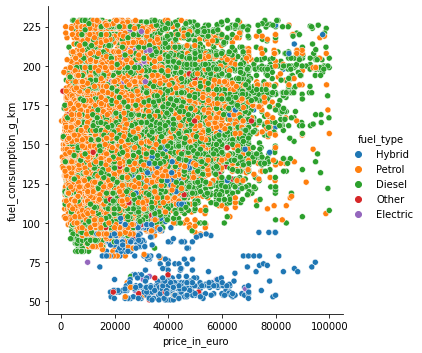

<Figure size 648x504 with 0 Axes>

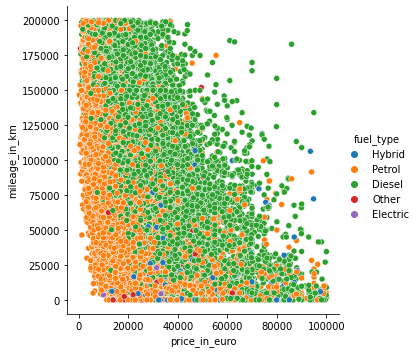

In [129]:
h=['brand','color','year','power_kw','power_ps','transmission_type','fuel_type','fuel_consumption_g_km','mileage_in_km']
for column in h:
    plt.figure(figsize=(9,7))
    sns.relplot(data=df,x='price_in_euro',y=column,hue='fuel_type')
    plt.show()

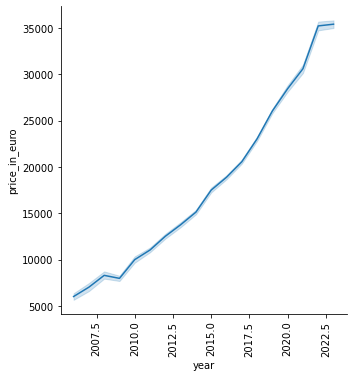

In [130]:
sns.relplot(data=df,x='year',y='price_in_euro',kind='line')
plt.xticks(rotation=90)
plt.show()

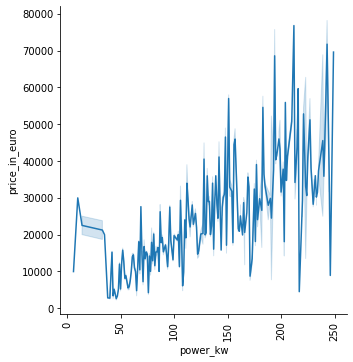

In [131]:
sns.relplot(data=df,x='power_kw',y='price_in_euro',kind='line')
plt.xticks(rotation=90)
plt.show()

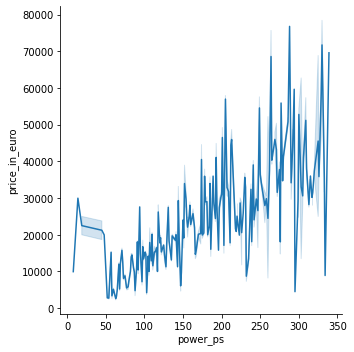

In [132]:
sns.relplot(data=df,x='power_ps',y='price_in_euro',kind='line')
plt.show()

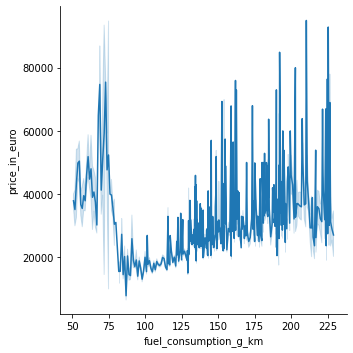

In [133]:
sns.relplot(data=df,x='fuel_consumption_g_km',y='price_in_euro',kind='line')
plt.show()

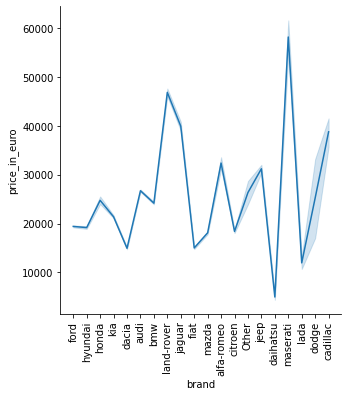

In [134]:
sns.relplot(data=df,x='brand',y='price_in_euro',kind='line')
plt.xticks(rotation=90)
plt.show()

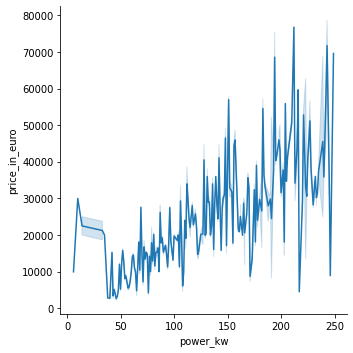

In [135]:
sns.relplot(data=df,x='power_kw',y='price_in_euro',kind='line')
plt.show()

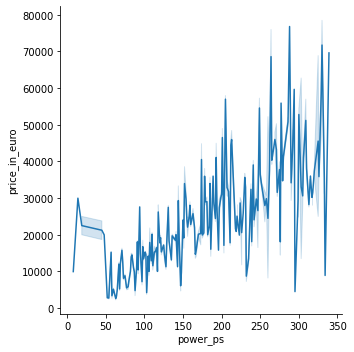

In [136]:
sns.relplot(data=df,x='power_ps',y='price_in_euro',kind='line')
plt.show()

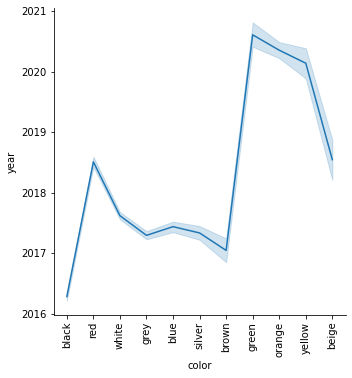

In [137]:
sns.relplot(data=df,x='color',y='year',kind='line')
plt.xticks(rotation=90)
plt.show()

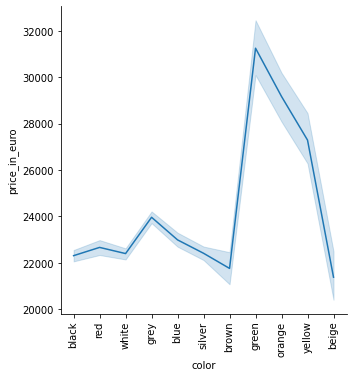

In [138]:
sns.relplot(data=df,x='color',y='price_in_euro',kind='line')
plt.xticks(rotation=90)
plt.show()

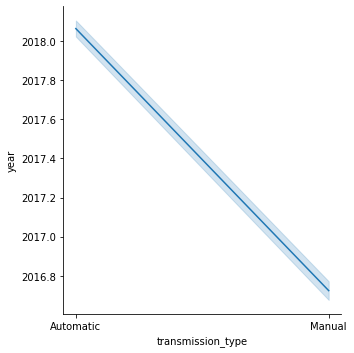

In [139]:
sns.relplot(data=df,x='transmission_type',y='year',kind='line')
plt.show()

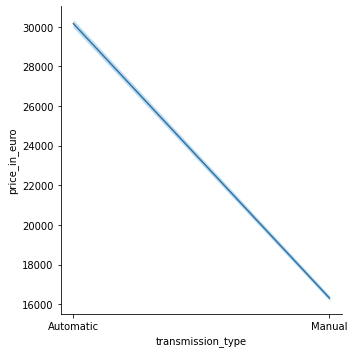

In [140]:
sns.relplot(data=df,x='transmission_type',y='price_in_euro',kind='line')
plt.show()

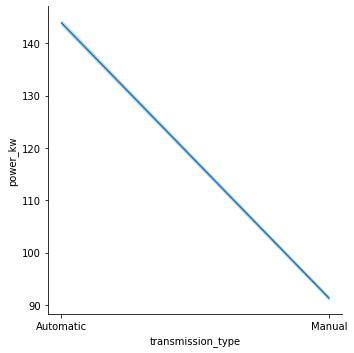

In [141]:
sns.relplot(data=df,x='transmission_type',y='power_kw',kind='line')
plt.show()

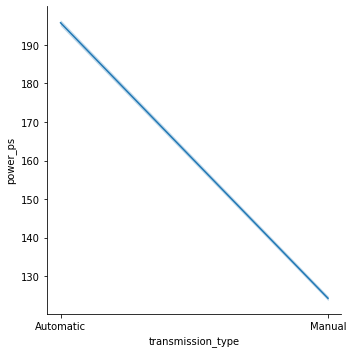

In [142]:
sns.relplot(data=df,x='transmission_type',y='power_ps',kind='line')
plt.show()

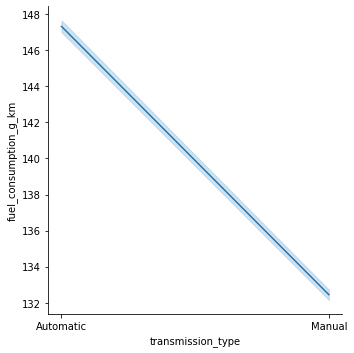

In [143]:
sns.relplot(data=df,x='transmission_type',y='fuel_consumption_g_km',kind='line')
plt.show()

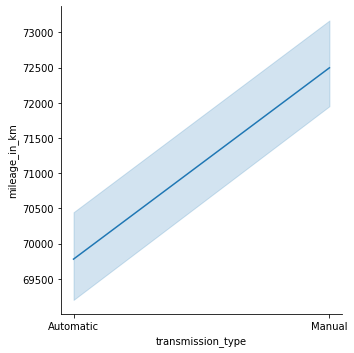

In [144]:
sns.relplot(data=df,x='transmission_type',y='mileage_in_km',kind='line')
plt.show()

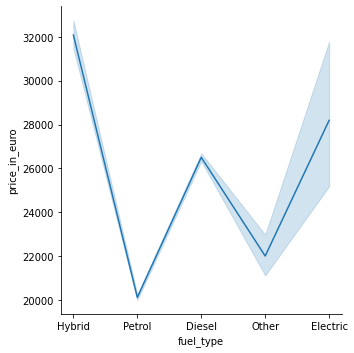

In [145]:
sns.relplot(data=df,x='fuel_type',y='price_in_euro',kind='line')
plt.show()

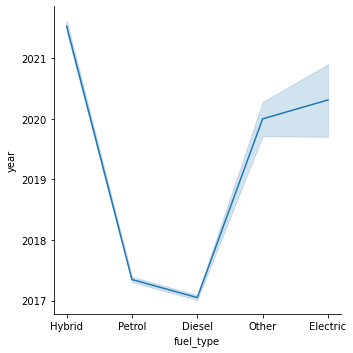

In [146]:
sns.relplot(data=df,x='fuel_type',y='year',kind='line')
plt.show()

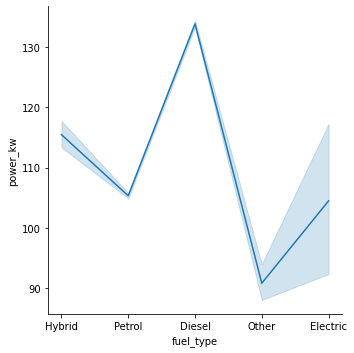

In [147]:
sns.relplot(data=df,x='fuel_type',y='power_kw',kind='line')
plt.show()

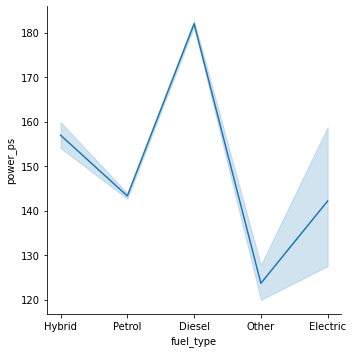

In [148]:
sns.relplot(data=df,x='fuel_type',y='power_ps',kind='line')
plt.show()

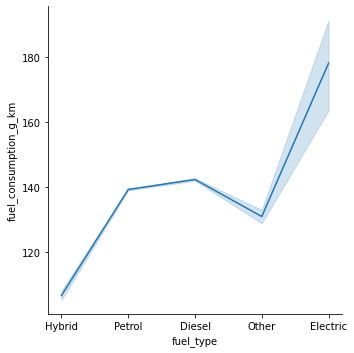

In [149]:
sns.relplot(data=df,x='fuel_type',y='fuel_consumption_g_km',kind='line')
plt.show()

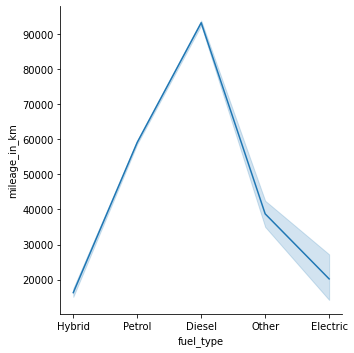

In [150]:
sns.relplot(data=df,x='fuel_type',y='mileage_in_km',kind='line')
plt.show()

<Figure size 648x504 with 0 Axes>

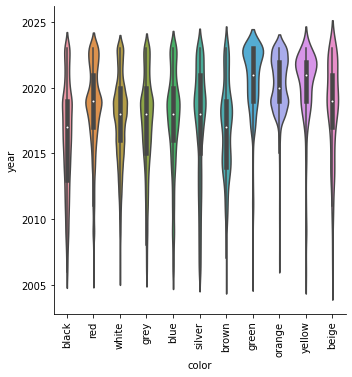

<Figure size 648x504 with 0 Axes>

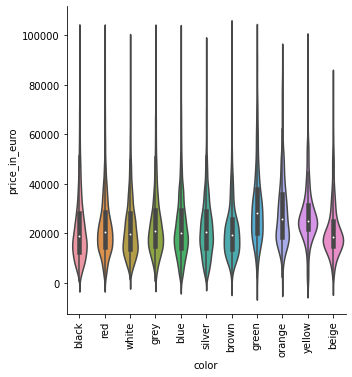

<Figure size 648x504 with 0 Axes>

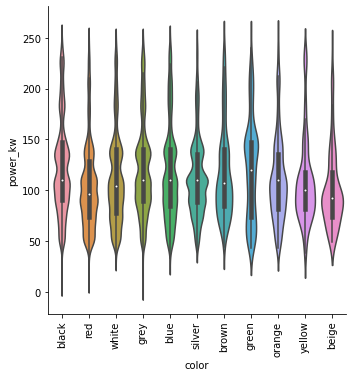

<Figure size 648x504 with 0 Axes>

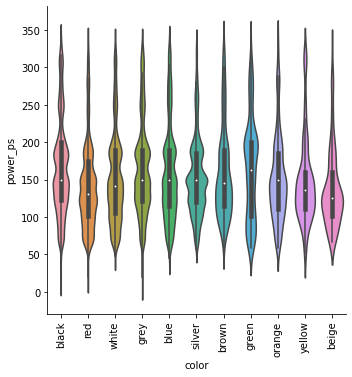

<Figure size 648x504 with 0 Axes>

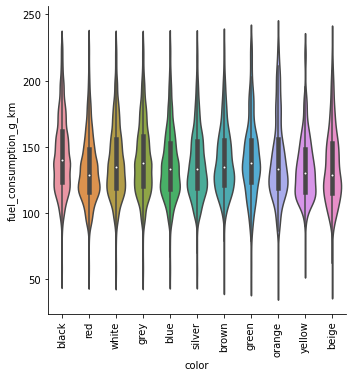

<Figure size 648x504 with 0 Axes>

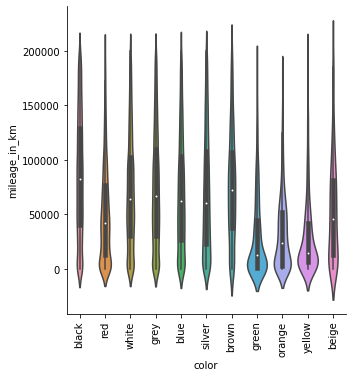

In [151]:
for column in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.catplot(data=df,x='color',y=column,kind='violin')
    plt.xticks(rotation=90)
    plt.show()

<Figure size 648x504 with 0 Axes>

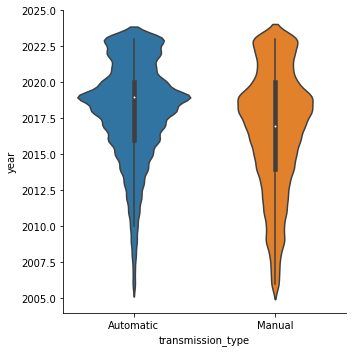

<Figure size 648x504 with 0 Axes>

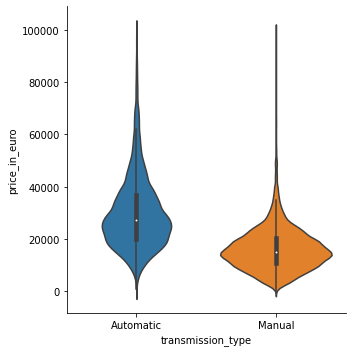

<Figure size 648x504 with 0 Axes>

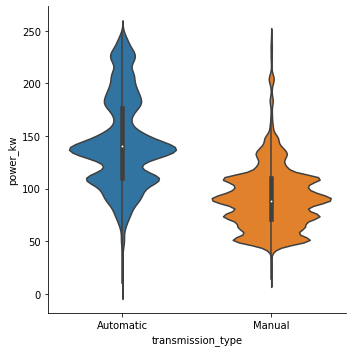

<Figure size 648x504 with 0 Axes>

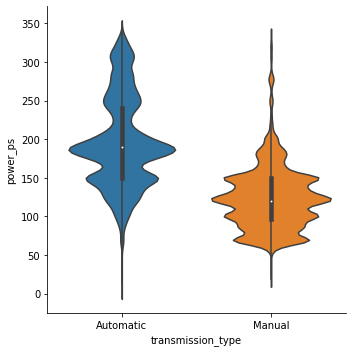

<Figure size 648x504 with 0 Axes>

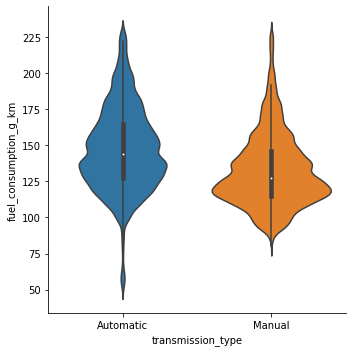

<Figure size 648x504 with 0 Axes>

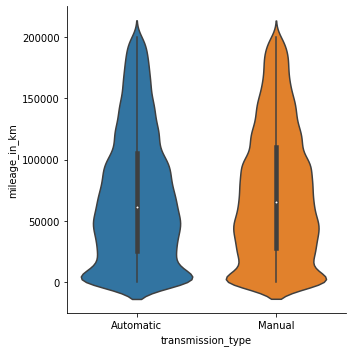

In [152]:
for column in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.catplot(data=df,x='transmission_type',y=column,kind='violin')
    plt.show()

<Figure size 648x504 with 0 Axes>

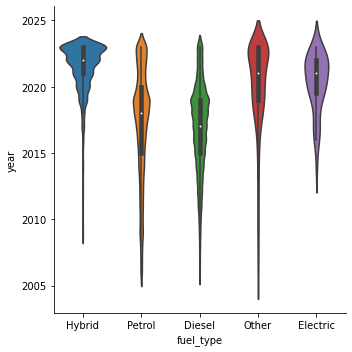

<Figure size 648x504 with 0 Axes>

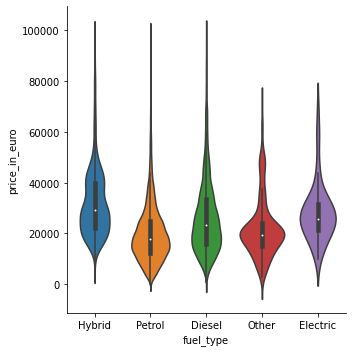

<Figure size 648x504 with 0 Axes>

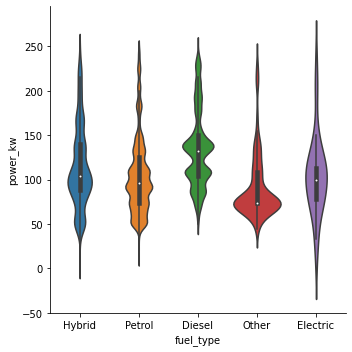

<Figure size 648x504 with 0 Axes>

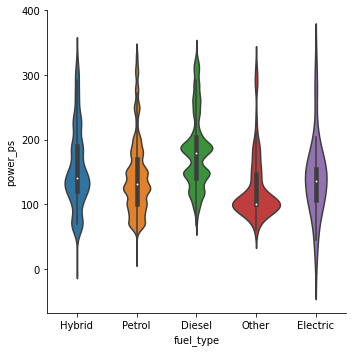

<Figure size 648x504 with 0 Axes>

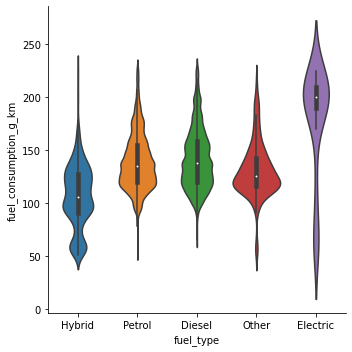

<Figure size 648x504 with 0 Axes>

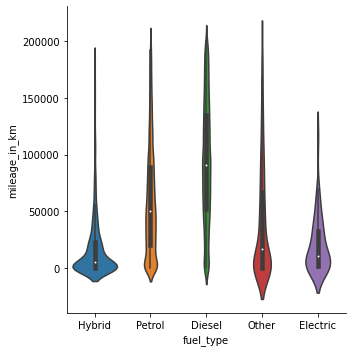

In [153]:
for column in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.catplot(data=df,x='fuel_type',y=column,kind='violin')
    plt.show()

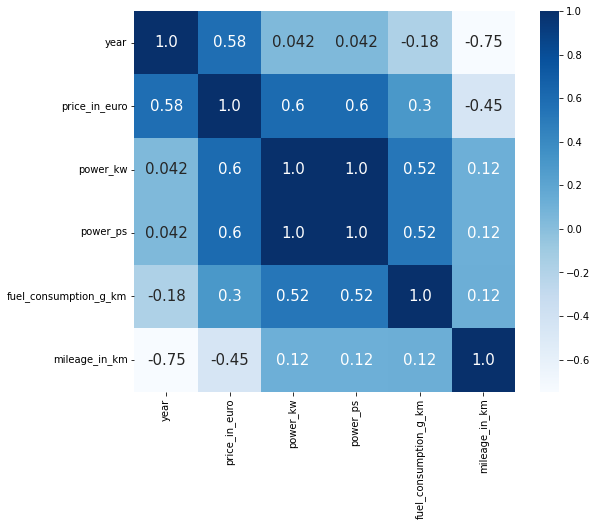

In [154]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='.2',cmap='Blues')
plt.show()

In [155]:
df.drop(columns=['power_ps'],axis=1,inplace=True)

In [156]:
df.head()

brand  color  year  price_in_euro  power_kw transmission_type fuel_type  \
0     ford  black  2023          38490       140         Automatic    Hybrid   
1  hyundai  black  2018          11555        49            Manual    Petrol   
3    honda    red  2018          24490       114         Automatic    Petrol   
4      kia  black  2023          34990       110            Manual    Petrol   
5    honda  black  2009           5800       103            Manual    Petrol   

   fuel_consumption_g_km  mileage_in_km  
0                  124.0          100.0  
1                  106.0        27782.0  
3                  175.0        57000.0  
4                  150.0         7500.0  
5                  155.0       160000.0

In [157]:
X=df.drop(columns=['price_in_euro'],axis='columns')
y=df['price_in_euro']

In [158]:
X

brand  color  year  power_kw transmission_type fuel_type  \
0            ford  black  2023       140         Automatic    Hybrid   
1         hyundai  black  2018        49            Manual    Petrol   
3           honda    red  2018       114         Automatic    Petrol   
4             kia  black  2023       110            Manual    Petrol   
5           honda  black  2009       103            Manual    Petrol   
...           ...    ...   ...       ...               ...       ...   
99995        audi   blue  2012        90            Manual    Petrol   
99996        fiat  black  2019        51         Automatic    Petrol   
99997       honda  brown  2019       127            Manual    Petrol   
99998  alfa-romeo   grey  2020       125         Automatic    Diesel   
99999        audi  black  2018       110            Manual    Petrol   

       fuel_consumption_g_km  mileage_in_km  
0                      124.0          100.0  
1                      106.0        27782.0  
3                      175.0        57000.0  
4                      150.0         7500.0  
5                      155.0       160000.0  
...                      ...            ...  
99995                  126.0       148000.0  
99996                  120.0        31698.0  
99997                  143.0        77900.0  
99998                  145.0        52251.0  
99999                  120.0        30400.0  

[59133 rows x 8 columns]

In [159]:
y

0        38490
1        11555
3        24490
4        34990
5         5800
         ...  
99995    12599
99996     9999
99997    24800
99998    22990
99999    21900
Name: price_in_euro, Length: 59133, dtype: int32

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [161]:
X_train.shape

(47306, 8)

In [162]:
X_test.shape

(11827, 8)

In [170]:
transformer_list=[('encode',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,4,5]),
                 ('scale',StandardScaler(),[2,3,6,7])]

In [171]:
step1=ColumnTransformer(transformer_list,remainder='passthrough')
xgb=XGBRegressor(learning_rate=0.3,n_estimators=120)
rf=RandomForestRegressor(min_samples_split=10,max_features=20,n_estimators=120)
et=ExtraTreesRegressor(max_depth=19,min_samples_split=15)
step2=VotingRegressor([('xgb',xgb),('rf',rf),('et',et)],weights=[3,2,1])
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_predict=pipe.predict(X_test)
r2=r2_score(y_predict,y_test)
MAE=mean_absolute_error(y_predict,y_test)
RMSE=np.sqrt(mean_squared_error(y_predict,y_test))
print('R2 Score is: ',r2)
print('Mean Absolute Error is: ',MAE)
print('RMSE is: ',RMSE)

R2 Score is:  0.8659961467915237
Mean Absolute Error is:  2686.919369667517
RMSE is:  4575.465821676168


In [172]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))